<a href="https://colab.research.google.com/github/mvkumar14/Lambda-Portfolio/blob/master/Unit1_Build_Week_102419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#All imports required for the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy.stats import norm
import plotly.graph_objects as go
import matplotlib.font_manager

I use some custom fonts for display in the final graphic. If you would like to use those fonts here, then 

## Sourcing Data

In [2]:
source = 'https://www.winstonslab.com/heroes/herodataJSON.php?page=1&dateGreater=2017-04-08&dateSmaller=2017-04-15&team%5B%5D='

#hd= hero data
hd = pd.read_json(source)
print(hd.shape)
hd.head()

(6642, 56)


,hero,map,roundtype,kills,deaths,ults,ultsUsed,timeUltsHold,timePlayed,team1Score,team2Score,team1Distance,team2Distance,maptype,team,team1,team2,picWide,firstUlts,timeToChargeUlts,timeToChargeFirstUlts,matchID,gameNumber,headshotKills,ultKills,teamsKills,fights,fightsWon,fightsLost,firstKills,firstDeaths,first3Kills,first3Deaths,fights3Kills,fightsUltUsed,fightsUltUsedWon,fightsUltUsedLost,fightsUltUsedLessUlts,fightsUltUsedLessUltsWon,fightsUltUsedLessUltsLost,fightsUltUsedMoreUlts,fightsUltUsedMoreUltsWon,fightsUltUsedMoreUltsLost,ultAdvWhenUlted,ultAdvWhenUltedAndWon,ultAdvWhenUltedAndLost,ultsOutsideOfFight,ultsUsedAfter,ultsUsed1Pless,ultsUsed1PlessWon,ultsUsed2Pless,ultsUsed2PlessWon,ultsUsed1Pmore,ultsUsed1PmoreWon,ultsUsed2Pmore,ultsUsed2PmoreWon
0,D.Va,Hanamura,Attack,4,1,1,1,8,205,1,2,0,0,Assault,12,16,12,/pics/heroes/dva_full.png,1,197,197,492,5,1,2,16,3,2,1,1,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zenyatta,Hanamura,Attack,2,2,1,1,28,205,1,2,0,0,Assault,12,16,12,/pics/heroes/zenyatta_full.png,1,135,135,492,5,0,0,16,3,2,1,0,0,0,1,3,1,1,0,0,0,0,1,1,0,2,2,0,0,0,0,0,0,0,0,0,1,1
2,Lucio,Hanamura,Attack,5,1,1,1,61,205,1,2,0,0,Assault,12,16,12,/pics/heroes/lucio_full.png,1,106,106,492,5,1,0,16,3,2,1,1,0,2,0,3,1,1,0,0,0,0,1,1,0,2,2,0,0,4,0,0,0,0,0,0,1,1
3,Winston,Hanamura,Attack,1,2,1,1,86,205,1,2,0,0,Assault,12,16,12,/pics/heroes/winston_full.png,1,88,88,492,5,0,0,16,3,2,1,0,0,0,1,3,1,1,0,0,0,0,1,1,0,2,2,0,0,11,0,0,0,0,0,0,1,1
4,Tracer,Hanamura,Attack,2,1,2,2,13,205,1,2,0,0,Assault,12,16,12,/pics/heroes/tracer_full.png,1,180,106,492,5,0,0,16,3,2,1,0,0,1,0,3,2,2,0,1,1,0,1,1,0,1,1,0,0,42,0,0,0,0,0,0,2,2


In [3]:
hd.describe()

,kills,deaths,ults,ultsUsed,timeUltsHold,timePlayed,team1Score,team2Score,team1Distance,team2Distance,team,team1,team2,firstUlts,timeToChargeUlts,timeToChargeFirstUlts,matchID,gameNumber,headshotKills,ultKills,teamsKills,fights,fightsWon,fightsLost,firstKills,firstDeaths,first3Kills,first3Deaths,fights3Kills,fightsUltUsed,fightsUltUsedWon,fightsUltUsedLost,fightsUltUsedLessUlts,fightsUltUsedLessUltsWon,fightsUltUsedLessUltsLost,fightsUltUsedMoreUlts,fightsUltUsedMoreUltsWon,fightsUltUsedMoreUltsLost,ultAdvWhenUlted,ultAdvWhenUltedAndWon,ultAdvWhenUltedAndLost,ultsOutsideOfFight,ultsUsedAfter,ultsUsed1Pless,ultsUsed1PlessWon,ultsUsed2Pless,ultsUsed2PlessWon,ultsUsed1Pmore,ultsUsed1PmoreWon,ultsUsed2Pmore,ultsUsed2PmoreWon
count,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000
mean,2.963264,2.962963,1.675248,1.600120,52.208522,285.238783,1.976212,2.018217,2144.754893,2130.539295,79.516712,73.935863,84.375038,0.917946,162.127823,95.613068,767.666215,2.308491,0.278832,0.405902,17.772207,5.942788,2.818278,2.817675,0.495634,0.495634,1.072267,1.239085,4.958446,1.419603,0.769347,0.575128,0.328214,0.105239,0.206865,0.764077,0.511743,0.216501,0.807136,0.797501,0.009636,0.076182,14.718759,0.236977,0.084914,0.342367,0.116381,0.296447,0.201144,0.377447,0.280036
std,3.231635,2.215158,1.353747,1.335911,54.825674,166.391479,1.216897,1.116116,3516.281014,3480.774921,64.540406,63.269699,65.715490,0.559147,122.321475,70.294308,65.658520,1.240953,0.667124,0.901545,12.880302,3.592775,2.273290,2.138842,0.811784,0.763216,1.285324,1.290878,3.088333,1.189699,0.896935,0.751549,0.572482,0.320799,0.454820,0.885163,0.729029,0.451648,1.948592,1.568716,1.150698,0.292313,22.932525,0.493444,0.297079,0.596564,0.351613,0.545656,0.450747,0.614136,0.532222
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,492.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-4.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,4.000000,164.000000,1.000000,1.000000,0.000000,0.000000,27.000000,19.000000,27.000000,1.000000,76.000000,57.250000,747.000000,1.000000,0.000000,0.000000,7.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,1.000000,1.000000,38.000000,268.000000,2.000000,2.000000,0.000000,0.000000,41.000000,39.000000,61.000000,1.000000,148.000000,93.000000,774.000000,2.000000,0.000000,0.000000,17.000000,6.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,2.000000,2.000000,80.000000,409.000000,3.000000,3.000000,4730.000000,4769.000000,145.000000,123.000000,149.000000,1.000000,246.000000,129.000000,816.000000,3.000000,0.000000,0.000000,26.000000,9.000000,4.000000,4.000000,1.000000,1.000000,2.000000,2

## Feature Engineering:

(done after I realized I neede these features later on in the notebook)


In [4]:
#The following condition will produce the "win" column.
#^ is XOR and the ~ at the front inverts the XOR to produce
# XAND.

hd['win'] = ~((hd.team == hd.team1) ^ (hd.team1Score>hd.team2Score))
hd.head()

,hero,map,roundtype,kills,deaths,ults,ultsUsed,timeUltsHold,timePlayed,team1Score,team2Score,team1Distance,team2Distance,maptype,team,team1,team2,picWide,firstUlts,timeToChargeUlts,timeToChargeFirstUlts,matchID,gameNumber,headshotKills,ultKills,teamsKills,fights,fightsWon,fightsLost,firstKills,firstDeaths,first3Kills,first3Deaths,fights3Kills,fightsUltUsed,fightsUltUsedWon,fightsUltUsedLost,fightsUltUsedLessUlts,fightsUltUsedLessUltsWon,fightsUltUsedLessUltsLost,fightsUltUsedMoreUlts,fightsUltUsedMoreUltsWon,fightsUltUsedMoreUltsLost,ultAdvWhenUlted,ultAdvWhenUltedAndWon,ultAdvWhenUltedAndLost,ultsOutsideOfFight,ultsUsedAfter,ultsUsed1Pless,ultsUsed1PlessWon,ultsUsed2Pless,ultsUsed2PlessWon,ultsUsed1Pmore,ultsUsed1PmoreWon,ultsUsed2Pmore,ultsUsed2PmoreWon,win
0,D.Va,Hanamura,Attack,4,1,1,1,8,205,1,2,0,0,Assault,12,16,12,/pics/heroes/dva_full.png,1,197,197,492,5,1,2,16,3,2,1,1,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
1,Zenyatta,Hanamura,Attack,2,2,1,1,28,205,1,2,0,0,Assault,12,16,12,/pics/heroes/zenyatta_full.png,1,135,135,492,5,0,0,16,3,2,1,0,0,0,1,3,1,1,0,0,0,0,1,1,0,2,2,0,0,0,0,0,0,0,0,0,1,1,True
2,Lucio,Hanamura,Attack,5,1,1,1,61,205,1,2,0,0,Assault,12,16,12,/pics/heroes/lucio_full.png,1,106,106,492,5,1,0,16,3,2,1,1,0,2,0,3,1,1,0,0,0,0,1,1,0,2,2,0,0,4,0,0,0,0,0,0,1,1,True
3,Winston,Hanamura,Attack,1,2,1,1,86,205,1,2,0,0,Assault,12,16,12,/pics/heroes/winston_full.png,1,88,88,492,5,0,0,16,3,2,1,0,0,0,1,3,1,1,0,0,0,0,1,1,0,2,2,0,0,11,0,0,0,0,0,0,1,1,True
4,Tracer,Hanamura,Attack,2,1,2,2,13,205,1,2,0,0,Assault,12,16,12,/pics/heroes/tracer_full.png,1,180,106,492,5,0,0,16,3,2,1,0,0,1,0,3,2,2,0,1,1,0,1,1,0,1,1,0,0,42,0,0,0,0,0,0,2,2,True


##Custom Functions:

### ```get_heroes```
A function to obtain the list of heroes from the data source. This is valuable when considering that this particular set has 24 heroes, but there are currentlt 31.

In [5]:
#heroes in this set of data 
#The reason that this is useful is because you don't have to perform loops on heroes
#you don't have in the set. 
def get_heroes(df):
  # if df.hero.value
  heroes = df.hero.value_counts().index
  return heroes

#This is a "global variable" Used whenever I want to loop through all the heroes
#in the dataset.
all_heroes = get_heroes(hd)
print(all_heroes)

Index(['Lucio', 'Tracer', 'Ana', 'Winston', 'D.Va', 'Soldier: 76', 'Genji',
       'Reinhardt', 'Zarya', 'Roadhog', 'Pharah', 'Zenyatta', 'Mccree',
       'Mercy', 'Widowmaker', 'Sombra', 'Mei', 'Hanzo', 'Torbjörn', 'Reaper',
       'Bastion', 'Orisa', 'Junkrat', 'Symmetra'],
      dtype='object')


### ```gauss_plot```

Plot a gaussian curve based on the stats of a series, or user-inputted values

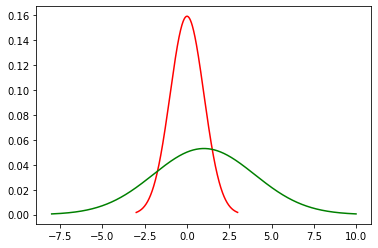

In [6]:
def gauss_plot(my_set=None,my_mean=None,my_stdev=None,width = 2,height = norm.pdf(0), output_plot=False,color='b'):
  """
  This is a function to plot the gaussian distribution, the input can be a pandas
  series, or it can be a specified mean and standard deviation. The output can 
  also be specified as plot or xy values.

  Dependencies:
  * scipy.stats.norm.pdf
  * pandas

  Inputs:
  my_set   = a pandas series
  my_mean  = a personally set mean 
  my_stdev = a personally set standard deviation
  width = number of standard deviations to plot(bidirectional)
      for example 2 would produce a graph from 
      -2 stdevs to 2 stdevs from mean
  height = Scale the y value of the gaussian.
      Note that this does change the shape of the curve, but if you don't
      want to deal with multiple axes then this could be useful
      purely as a visualization tool
      see _insert link here_ for details on how the visualization is affected
      by the height parameter.
  output_plot = should the function output a plot or return x,y values?
      True = plot directly (using matplotlib.pyplot.plot())
      False = return x, and y values (format a,b = thisfunct(your parameters)
  color = color of graph. this only matters if output_plot = True
  
  Returns:
  if output_plot = True :
    returns nothing, but should print plot (make sure of %matplotlib inline)
  else if output_plot = False:
    returns x and y values of gaussian plot
  """
  try:
    if my_set == None:
      if my_mean == None and my_stdev == None:
        print("You are missing required values")
        return
      else: 
        lb = (my_mean-(my_stdev*width))
        ub = (my_mean+(my_stdev*width))
        x_axis = np.arange(lb,ub,0.01)
        if output_plot == True: 
          plt.plot(x_axis,(norm.pdf(x_axis,my_mean,my_stdev))*height,color=color);
          return
        else:
          return x_axis, (norm.pdf(x_axis,my_mean,my_stdev))*height
  except ValueError:
    set_mean = my_set.mean()
    set_stdev = my_set.std()
    lb = (set_mean-(set_stdev*width))
    ub = (set_mean+(set_stdev*width))
    x_axis = np.arange(lb,ub,0.01)
    if output_plot == True: 
      plt.plot(x_axis,(norm.pdf(x_axis,set_mean,set_stdev)*height),color=color);
      return
    else:
      return x_axis, (norm.pdf(x_axis,set_mean,set_stdev)*height)
    
#Testing both "manual" cases
gauss_plot(None,0,1,3,output_plot=True,color='r')
x,y = gauss_plot(None,1,3,3,output_plot=False)
plt.plot(x,y,color = 'g');

### ```group_by```

In [0]:
def group_by(df,col):
  """
  Inputs:
  df = dataframe
  col = column to groupby

  Outputs:
  dictionary where:
  keys = the different values in the column you are grouping by
      (ex: column contains car colors. The keys would be the colors
      (red, black, silver...))
  values = dataframes that only contain rows with the key value specified
      (ex: dict[red] would contain a dataframe with all the red cars)
  
  Example:
  your_dict = group_by(df,col) 
  """
  x = df.groupby(col)
  my_dict = {}
  for key,i in x:
    my_dict[key]=i
  return my_dict

## Exploration:

This is hero data frmo 2017-04-8 - 2017-04-15 

I choose this timespan because it had a larger amount of data than other timespans within the particular patch I was looking at. 

In [8]:
#Used later on when seperating the data 
col_names = hd.columns.tolist()
col_names

['hero',
 'map',
 'roundtype',
 'kills',
 'deaths',
 'ults',
 'ultsUsed',
 'timeUltsHold',
 'timePlayed',
 'team1Score',
 'team2Score',
 'team1Distance',
 'team2Distance',
 'maptype',
 'team',
 'team1',
 'team2',
 'picWide',
 'firstUlts',
 'timeToChargeUlts',
 'timeToChargeFirstUlts',
 'matchID',
 'gameNumber',
 'headshotKills',
 'ultKills',
 'teamsKills',
 'fights',
 'fightsWon',
 'fightsLost',
 'firstKills',
 'firstDeaths',
 'first3Kills',
 'first3Deaths',
 'fights3Kills',
 'fightsUltUsed',
 'fightsUltUsedWon',
 'fightsUltUsedLost',
 'fightsUltUsedLessUlts',
 'fightsUltUsedLessUltsWon',
 'fightsUltUsedLessUltsLost',
 'fightsUltUsedMoreUlts',
 'fightsUltUsedMoreUltsWon',
 'fightsUltUsedMoreUltsLost',
 'ultAdvWhenUlted',
 'ultAdvWhenUltedAndWon',
 'ultAdvWhenUltedAndLost',
 'ultsOutsideOfFight',
 'ultsUsedAfter',
 'ultsUsed1Pless',
 'ultsUsed1PlessWon',
 'ultsUsed2Pless',
 'ultsUsed2PlessWon',
 'ultsUsed1Pmore',
 'ultsUsed1PmoreWon',
 'ultsUsed2Pmore',
 'ultsUsed2PmoreWon',
 'win']

In [9]:
hd.isna().sum()

hero                         0
map                          0
roundtype                    0
kills                        0
deaths                       0
ults                         0
ultsUsed                     0
timeUltsHold                 0
timePlayed                   0
team1Score                   0
team2Score                   0
team1Distance                0
team2Distance                0
maptype                      0
team                         0
team1                        0
team2                        0
picWide                      0
firstUlts                    0
timeToChargeUlts             0
timeToChargeFirstUlts        0
matchID                      0
gameNumber                   0
headshotKills                0
ultKills                     0
teamsKills                   0
fights                       0
fightsWon                    0
fightsLost                   0
firstKills                   0
firstDeaths                  0
first3Kills                  0
first3De

### Overview Stats

This is where I started my exploration. I looked at common statistics used to measure hero performance. I also looked at the mean performance of all the heroes across these categories, and compared them in a (unnormalized) heat map, and a bar graph. 

The insight I get from this section is that the game is pretty balanced among the heroes that are used. The fact that certain heroes are not used very often (jump to the Timeplayed stats section) shows the few heroes that are not balanced properly. these statistics commonly change over time, and it would be interesting to show these slices over years of overwatch.

In [10]:
overview = hd[['hero','map','maptype','kills','deaths','win']]
overview['kd'] = overview.kills/overview.deaths
overview.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hero,map,maptype,kills,deaths,win,kd
0,D.Va,Hanamura,Assault,4,1,True,4.0
1,Zenyatta,Hanamura,Assault,2,2,True,1.0
2,Lucio,Hanamura,Assault,5,1,True,5.0
3,Winston,Hanamura,Assault,1,2,True,0.5
4,Tracer,Hanamura,Assault,2,1,True,2.0


In [11]:
#lets see what pickrates are like for this dataset:
overview.hero.value_counts()

Lucio          822
Tracer         781
Ana            613
Winston        606
D.Va           567
Soldier: 76    555
Genji          492
Reinhardt      452
Zarya          376
Roadhog        336
Pharah         254
Zenyatta       213
Mccree         165
Mercy          147
Widowmaker      69
Sombra          62
Mei             50
Hanzo           26
Torbjörn        25
Reaper          15
Bastion          7
Orisa            5
Junkrat          2
Symmetra         2
Name: hero, dtype: int64

In [12]:
overview.sort_values(by='kd')
#now I want non-zero kds
df = overview[(overview.deaths==0) & (overview.kills >0)]
print(df.shape)
df.head()
df.sort_values(by='kills',ascending=False).head()

(407, 7)


,hero,map,maptype,kills,deaths,win,kd
2638,Soldier: 76,Nepal,Control,14,0,True,inf
4603,D.Va,Route 66,Escort,13,0,True,inf
2667,Soldier: 76,Nepal,Control,12,0,True,inf
5659,Roadhog,King's Row,Hybrid,12,0,True,inf
1472,Tracer,Lijiang Tower,Control,12,0,True,inf


In [13]:
df=overview[overview.deaths!=0]
df = df.join(hd[['fights','fightsWon','fightsLost']])
df['fight_winrate'] = df.fightsWon/df.fights
df.sort_values(by='fights',ascending=False).head()


,hero,map,maptype,kills,deaths,win,kd,fights,fightsWon,fightsLost,fight_winrate
6214,Lucio,King's Row,Hybrid,1,6,False,0.166667,16,5,9,0.3125
6235,Reinhardt,King's Row,Hybrid,5,10,False,0.500000,16,5,9,0.3125
6217,Ana,King's Row,Hybrid,1,6,False,0.166667,16,5,9,0.3125
4050,Lucio,Dorado,Escort,3,4,True,0.750000,16,7,8,0.4375
4049,D.Va,Dorado,Escort,7,3,False,2.333333,16,8,7,0.5000


I want to engineer a feature so that when I order by that feature:
I can see the characters that fought a lot, and won a lot of those fights. There should be weight placed on the number of fights. This could be calculated in many ways, one method would be to use statistical liklihood. Yes if you only fought two times, and won both times you have a better winrate than someone who 

How, exactly, to impliment statistics here? Maybe the average and std deviation of these values across the hero can tell us 


In [14]:
df.sort_values(by='fightsWon',ascending=False).head()


,hero,map,maptype,kills,deaths,win,kd,fights,fightsWon,fightsLost,fight_winrate
4653,Lucio,Route 66,Escort,5,5,True,1.000000,14,11,3,0.785714
5896,Reinhardt,King's Row,Hybrid,14,6,True,2.333333,15,11,3,0.733333
581,Lucio,Temple of Anubis,Assault,0,1,True,0.000000,12,11,1,0.916667
580,Winston,Temple of Anubis,Assault,8,2,True,4.000000,12,11,1,0.916667
5889,Tracer,King's Row,Hybrid,10,5,True,2.000000,15,11,3,0.733333


In [15]:
#Testing to see how to retrive summary statistics:
print(df[df.hero=='Genji'].describe().loc['mean'])
print(df[df.hero=='Genji'].describe().iloc[1])
df[df.hero=='Genji'].describe()

kills            5.131111
deaths           3.513333
kd               1.847532
fights           6.466667
fightsWon        2.953333
fightsLost       3.168889
fight_winrate    0.424392
Name: mean, dtype: float64
kills            5.131111
deaths           3.513333
kd               1.847532
fights           6.466667
fightsWon        2.953333
fightsLost       3.168889
fight_winrate    0.424392
Name: mean, dtype: float64


,kills,deaths,kd,fights,fightsWon,fightsLost,fight_winrate
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,440.000000
mean,5.131111,3.513333,1.847532,6.466667,2.953333,3.168889,0.424392
std,4.012027,1.996891,2.106523,3.475014,2.274101,2.103748,0.277890
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.616667,4.000000,1.000000,1.000000,0.222222
50%,5.000000,3.000000,1.200000,6.000000,3.000000,3.000000,0.428571
75%,8.000000,5.000000,2.333333,9.000000,5.000000,4.000000,0.617788
max,19.000000,11.000000,18.000000,15.000000,10.000000,10.000000,1.000000


In [16]:
stats = {}
for one_hero in get_heroes(df):
  # print(one_hero)
  stats[one_hero]= df[df.hero==one_hero].describe().T['mean']
print(stats)

{'Lucio': kills            1.590269
deaths           4.047375
kd               0.535115
fights           7.994878
fightsWon        3.708067
fightsLost       3.874520
fight_winrate    0.455882
Name: mean, dtype: float64, 'Tracer': kills            4.838710
deaths           3.221408
kd               1.859134
fights           6.189150
fightsWon        2.848974
fightsLost       3.030792
fight_winrate    0.424299
Name: mean, dtype: float64, 'Ana': kills            0.917098
deaths           3.877375
kd               0.345573
fights           7.430052
fightsWon        3.309154
fightsLost       3.694301
fight_winrate    0.431751
Name: mean, dtype: float64, 'Winston': kills            3.580071
deaths           3.603203
kd               1.277206
fights           6.512456
fightsWon        3.030249
fightsLost       3.163701
fight_winrate    0.440826
Name: mean, dtype: float64, 'Soldier: 76': kills            4.548523
deaths           3.274262
kd               1.598039
fights           6.052743
fig

                kills    deaths        kd  ...  fightsWon  fightsLost  fight_winrate
Lucio        1.590269  4.047375  0.535115  ...   3.708067    3.874520       0.455882
Tracer       4.838710  3.221408  1.859134  ...   2.848974    3.030792       0.424299
Ana          0.917098  3.877375  0.345573  ...   3.309154    3.694301       0.431751
Winston      3.580071  3.603203  1.277206  ...   3.030249    3.163701       0.440826
Soldier: 76  4.548523  3.274262  1.598039  ...   2.810127    2.930380       0.427350

[5 rows x 7 columns]


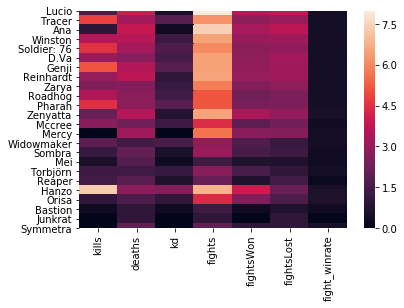

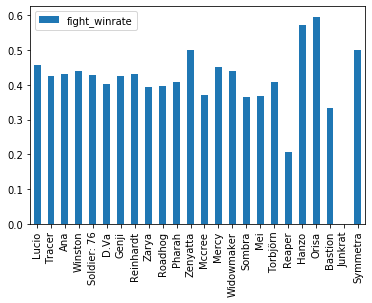

In [17]:
#lets try to put those values back into a datframe
stats_df = pd.DataFrame.from_dict(stats).T
# stats_df['fight_winrate']=(stats_df.fightsWon/stats_df.fights)
print(stats_df.head())
# stats_df.plot(y='fight_winrate',use_index=True,kind="bar")
sns.heatmap(stats_df,yticklabels=True)
plt.show()
# print(stats_df.index)
# print(stats_df['fight_winrate'])
stats_df.plot(y='fight_winrate',kind = 'bar',use_index=True)
# g = sns.factorplot(data=stats_df)
# sns.heatmap(test,yticklabels=True)

the graphs above show statistics values for the various columns of this dataset. 

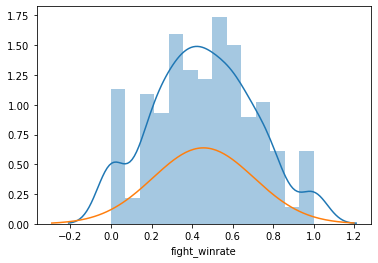

In [18]:
sns.distplot(df[df.hero=='Lucio'].fight_winrate)
x,y=gauss_plot(df[df.hero=='Lucio'].fight_winrate,width = 3)
plt.plot(x,y)

The graph above shows the distplot, and the statistics of the dataset.
The orange plot is the gaussian distribution based on the statistics of the data. 
The blue histogram and line are the distplot of the data.

In [19]:
df[df.hero=='Lucio'].describe()

,kills,deaths,kd,fights,fightsWon,fightsLost,fight_winrate
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,1.590269,4.047375,0.535115,7.994878,3.708067,3.874520,0.455882
std,1.566020,2.177168,0.749934,3.129672,2.263263,2.170815,0.249328
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,0.285714
50%,1.000000,4.000000,0.333333,8.000000,4.000000,4.000000,0.444444
75%,2.000000,5.000000,0.666667,11.000000,5.000000,5.000000,0.625000
max,9.000000,13.000000,8.000000,16.000000,11.000000,11.000000,1.000000


Now I want to create a 3d graph where every slice is a gauss plot, and when viewed from the left isometric view you have a bar graph that shows the means of the values in the distplot.


In [20]:

print(df.head())
print(df.shape)
temp=df.drop(df[df["fights"] == 0].index)
print(df[df["fights"] == 0].index)
print(temp.shape)
temp.isna().sum()

       hero       map  maptype  ...  fightsWon  fightsLost  fight_winrate
0      D.Va  Hanamura  Assault  ...          2           1       0.666667
1  Zenyatta  Hanamura  Assault  ...          2           1       0.666667
2     Lucio  Hanamura  Assault  ...          2           1       0.666667
3   Winston  Hanamura  Assault  ...          2           1       0.666667
4    Tracer  Hanamura  Assault  ...          2           1       0.666667

[5 rows x 11 columns]
(5902, 11)
Int64Index([  29,   62,   66,  184,  187,  235,  237,  254,  323,  393,
            ...
            6376, 6431, 6447, 6453, 6462, 6465, 6477, 6491, 6523, 6632],
           dtype='int64', length=114)
(5788, 11)


hero             0
map              0
maptype          0
kills            0
deaths           0
win              0
kd               0
fights           0
fightsWon        0
fightsLost       0
fight_winrate    0
dtype: int64

[0.0, 0.07142857142857142, 0.14285714285714285, 0.2142857142857143, 0.2857142857142857, 0.3571428571428571, 0.4285714285714286, 0.5, 0.5714285714285714, 0.6428571428571428, 0.7142857142857142, 0.7857142857142857, 0.8571428571428571, 0.9285714285714284]
[1.1293213828425097, 0.21510883482714468, 1.0934699103713188, 0.9321382842509603, 1.5953905249679903, 1.2906530089628676, 1.2189500640204862, 1.7387964148527537, 1.5057618437900133, 0.89628681177977, 1.021766965428936, 0.6094750320102436, 0.1434058898847632, 0.6094750320102427]


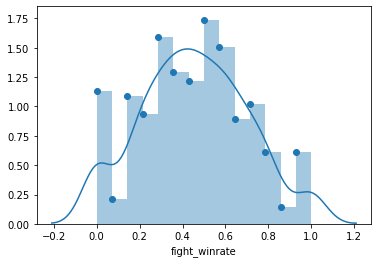

In [21]:
#First create 2 graphs on 3d plane:
# Heroes = ['Lucio','Tracer']
# for one_hero in Heroes:
#   print(one_hero)
#   sns.distplot(temp[temp.hero==one_hero].fight_winrate).patches

a = sns.distplot(temp[temp.hero=="Lucio"].fight_winrate).patches
x = [b.get_x() for b in a]
y = [b.get_height() for b in a]
print(x)
print(y)
plt.scatter(x,y)

In [22]:
#Lets see if I can do 3d

# pip install plotly
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

N = 70
z = [1]*len(x)

trace1 = go.Bar(
    x=x,
    y=y
)

trace2 = go.Scatter3d(
    x=x,
    y=z,
    z=y
)

fig = go.Figure(data=[trace2])


# fig.update_layout(scene = dict(
#         xaxis = dict(nticks=4, range=[-5,5],),
#                      yaxis = dict(nticks=4, range=[-10,10],),
#                      zaxis = dict(nticks=4, range=[-10,10],),),
#                      width=700,
#                      margin=dict(r=20, l=10, b=10, t=10))

fig.show()



In [23]:
#Testing a volume graph:
x =[0.1,0.1,-0.1,-0.1,0.1,0.1,-0.1,-0.1]
y =[1,-1,1,-1,1,-1,1,-1]
z =[0,0,0,0,1,1,1,1]
values = x+y+z

fig = go.Figure(data=go.Volume(
    x=x,
    y=y,
    z=z,
    value=values,
    isomin=0.1,
    isomax=0.8,
    opacity=1, # needs to be small to see through all surfaces
    surface_count=17, # needs to be a large number for good volume rendering
    ))
fig.show()

### Kill Stats:

In [24]:
kills = hd[['hero','map','maptype','kills','first3Kills','firstKills','headshotKills','fights3Kills','teamsKills']]
print(kills.shape)
kills.sort_values(by='hero').head()
print(kills.maptype.value_counts())
kills.head()

(6642, 9)
Control    2552
Hybrid     1891
Assault    1148
Escort     1051
Name: maptype, dtype: int64


,hero,map,maptype,kills,first3Kills,firstKills,headshotKills,fights3Kills,teamsKills
0,D.Va,Hanamura,Assault,4,2,1,1,3,16
1,Zenyatta,Hanamura,Assault,2,0,0,0,3,16
2,Lucio,Hanamura,Assault,5,2,1,1,3,16
3,Winston,Hanamura,Assault,1,0,0,0,3,16
4,Tracer,Hanamura,Assault,2,1,0,0,3,16


### Ultimate Stats:

Ultimate effectiveness can be measured in many ways. I measure, and graph it here (by hero) with number of kills/ult. 

This section also includes a set of bar graphs that show various mean statistics by hero (bars are heroes, and y axis is statistic of interest. There are 6 graphs based on the 6 features I choose to look at)

In addition to "Ultimate" effectiveness you can also look at the ```timeToFirstUlt``` stat as a means to gauge general effectiveness. To truly "normalize" this however the hero base ultimate charge rate would have to be taken into account

In [25]:
ults = hd[['hero',
           'map',
           'maptype',
           'firstUlts',
           'ultKills',
           'ults',
           'ultsUsed',
           'timeToChargeFirstUlts',
           'timeToChargeUlts',
           'timeUltsHold',]]
print(ults.shape)
ults.head()

(6642, 10)


,hero,map,maptype,firstUlts,ultKills,ults,ultsUsed,timeToChargeFirstUlts,timeToChargeUlts,timeUltsHold
0,D.Va,Hanamura,Assault,1,2,1,1,197,197,8
1,Zenyatta,Hanamura,Assault,1,0,1,1,135,135,28
2,Lucio,Hanamura,Assault,1,0,1,1,106,106,61
3,Winston,Hanamura,Assault,1,0,1,1,88,88,86
4,Tracer,Hanamura,Assault,1,0,2,2,106,180,13


In [26]:
#There are a lot of rows where no ults are used:
print('ults shape:\n',ults.shape)
print('shape of df where ultsUsed == 0:\n',ults[ults.ultsUsed == 0].shape)
print('percent of df where ults were not used:\n',ults[ults.ultsUsed == 0].shape[0]/ults.shape[0])

ults shape:
 (6642, 10)
shape of df where ultsUsed == 0:
 (1442, 10)
percent of df where ults were not used:
 0.21710328214393254


In [27]:
#Lets drop all the rows where ultsUsed==0
ults=ults[ults.ultsUsed!=0]
print(ults.shape)
ults.head()

(5200, 10)


,hero,map,maptype,firstUlts,ultKills,ults,ultsUsed,timeToChargeFirstUlts,timeToChargeUlts,timeUltsHold
0,D.Va,Hanamura,Assault,1,2,1,1,197,197,8
1,Zenyatta,Hanamura,Assault,1,0,1,1,135,135,28
2,Lucio,Hanamura,Assault,1,0,1,1,106,106,61
3,Winston,Hanamura,Assault,1,0,1,1,88,88,86
4,Tracer,Hanamura,Assault,1,0,2,2,106,180,13


In [28]:
#taking a look at the time it takes to charge first ult for Genji specifically
ults[(ults.hero=='Genji')].sort_values(by='timeToChargeFirstUlts').head()

,hero,map,maptype,firstUlts,ultKills,ults,ultsUsed,timeToChargeFirstUlts,timeToChargeUlts,timeUltsHold
2067,Genji,Lijiang Tower,Control,1,1,2,2,40,148,68
3545,Genji,Oasis,Control,1,3,1,1,43,43,4
2286,Genji,Lijiang Tower,Control,1,2,2,2,44,128,28
1696,Genji,Lijiang Tower,Control,1,1,2,2,44,144,20
2091,Genji,Lijiang Tower,Control,1,1,1,1,48,48,28


In [29]:
#I want to look at some statistics 
#Note that for reaper there are only 6 instances where he used his ult at least 1 time.
ults[ults.hero=="Reaper"].describe().T
#the reason that I used the transposed version is because I can take the mean 
#values from this df as a column to append to another df.
#I use this trick below to create a new df with mean statistics:

,count,mean,std,min,25%,50%,75%,max
firstUlts,6.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
ultKills,6.0,0.833333,0.752773,0.0,0.25,1.0,1.0,2.0
ults,6.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
ultsUsed,6.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
timeToChargeFirstUlts,6.0,93.833333,12.464617,80.0,82.75,94.0,104.5,108.0
timeToChargeUlts,6.0,93.833333,12.464617,80.0,82.75,94.0,104.5,108.0
timeUltsHold,6.0,39.166667,37.812256,4.0,8.00,28.0,72.0,87.0


In [30]:
#creating a dataframe with mean values for every feature for every hero
means = {}
for one_hero in get_heroes(ults):
  # print(one_hero)
  means[one_hero]= ults[ults.hero==one_hero].describe().T['mean']
# print(stats)
means_df = pd.DataFrame.from_dict(means).T
means_df.head()

,firstUlts,ultKills,ults,ultsUsed,timeToChargeFirstUlts,timeToChargeUlts,timeUltsHold
Lucio,1.150203,0.000000,1.759134,1.698241,151.991881,232.412720,56.005413
Tracer,1.182400,0.929600,2.779200,2.641600,94.576000,204.145600,77.905600
Ana,1.152482,0.000000,2.374113,2.312057,101.691489,221.751773,74.911348
Winston,1.158763,0.486598,1.808247,1.754639,135.843299,207.876289,67.047423
D.Va,1.119658,0.608974,3.106838,3.025641,119.232906,220.957265,65.933761


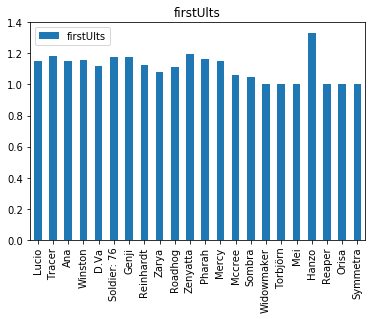

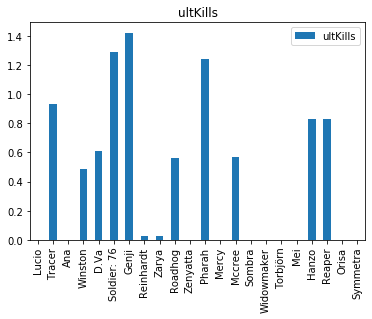

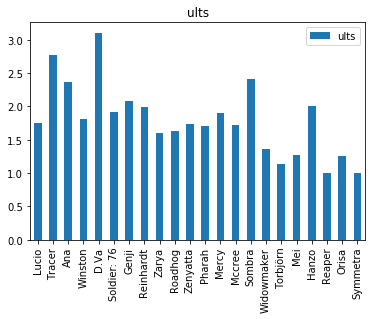

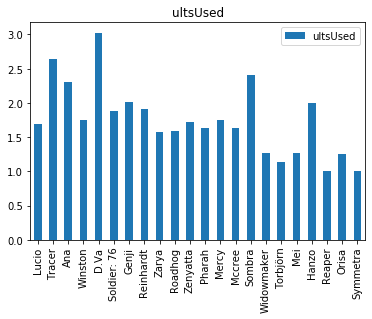

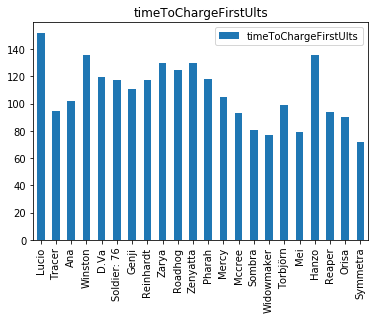

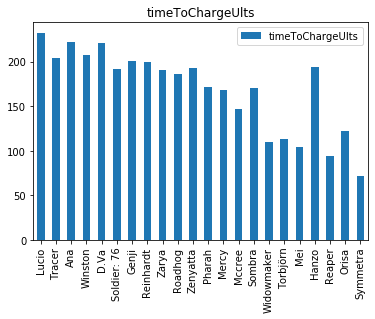

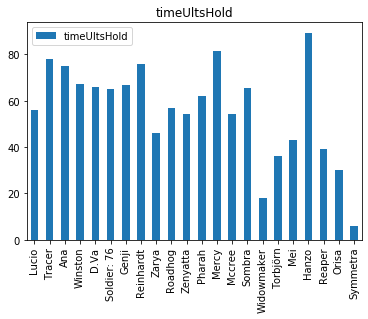

In [31]:
# creating bar graphs that show the mean stats for all the 
# columns of interest for all the heroes
for col in means_df:
  fig = means_df.plot(y=col,kind = 'bar',use_index=True)
  fig.set_title(col)

In [32]:
means_df.head()

,firstUlts,ultKills,ults,ultsUsed,timeToChargeFirstUlts,timeToChargeUlts,timeUltsHold
Lucio,1.150203,0.000000,1.759134,1.698241,151.991881,232.412720,56.005413
Tracer,1.182400,0.929600,2.779200,2.641600,94.576000,204.145600,77.905600
Ana,1.152482,0.000000,2.374113,2.312057,101.691489,221.751773,74.911348
Winston,1.158763,0.486598,1.808247,1.754639,135.843299,207.876289,67.047423
D.Va,1.119658,0.608974,3.106838,3.025641,119.232906,220.957265,65.933761


In [33]:
#Adding "ultkills/unit time" column. This is to gauge effectivnness in game
means_df['ultKillsPUlt']=means_df.ultKills/means_df.ultsUsed
means_df.head()

,firstUlts,ultKills,ults,ultsUsed,timeToChargeFirstUlts,timeToChargeUlts,timeUltsHold,ultKillsPUlt
Lucio,1.150203,0.000000,1.759134,1.698241,151.991881,232.412720,56.005413,0.000000
Tracer,1.182400,0.929600,2.779200,2.641600,94.576000,204.145600,77.905600,0.351908
Ana,1.152482,0.000000,2.374113,2.312057,101.691489,221.751773,74.911348,0.000000
Winston,1.158763,0.486598,1.808247,1.754639,135.843299,207.876289,67.047423,0.277321
D.Va,1.119658,0.608974,3.106838,3.025641,119.232906,220.957265,65.933761,0.201271


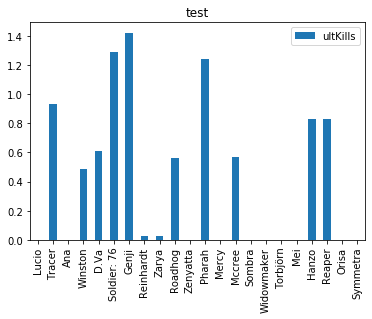

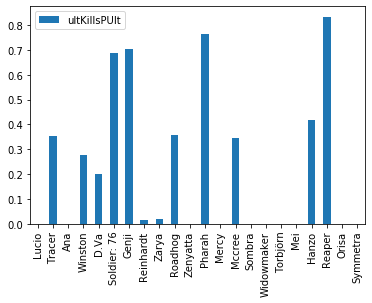

In [34]:
means_df.plot(y='ultKills',kind = 'bar',use_index=True)
plt.title('test')
means_df.plot(y='ultKillsPUlt',kind = 'bar',use_index=True)

### "Time Played" Stats

I found here that certain characters weren't played for very long in this dataset. for my final visuals I dropped these characters from the analysis, or at the very least point out that the data that backs the visualization for these characters is sparse.

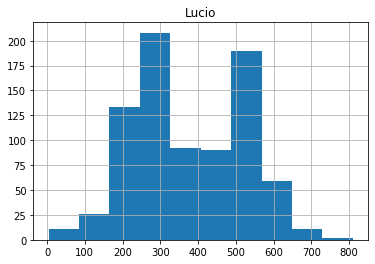

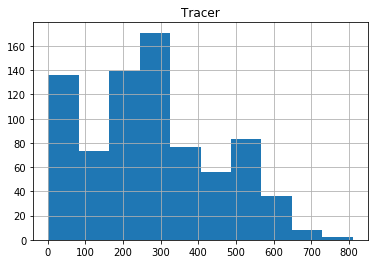

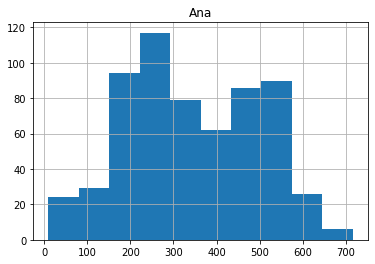

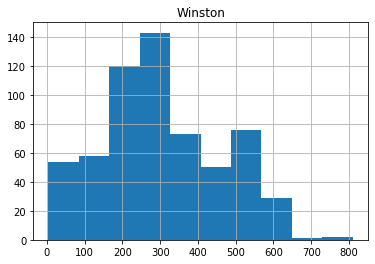

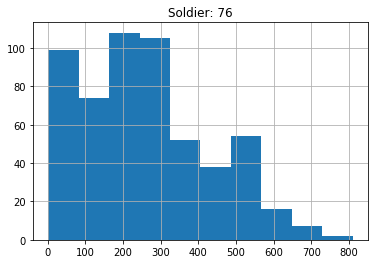

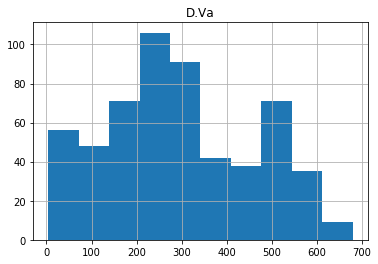

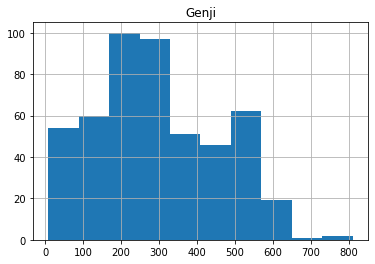

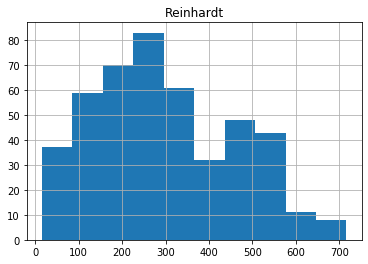

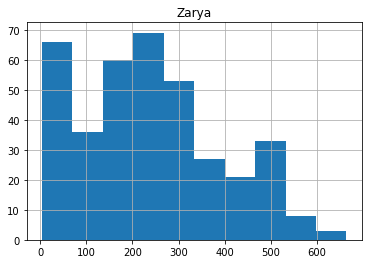

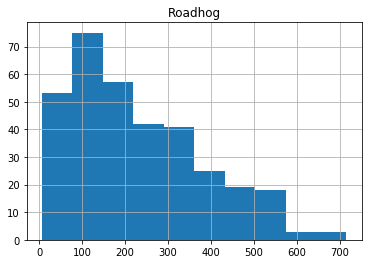

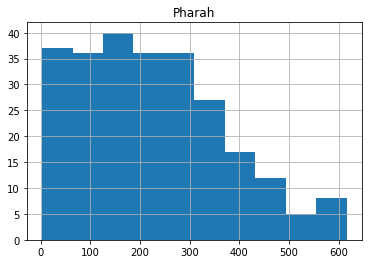

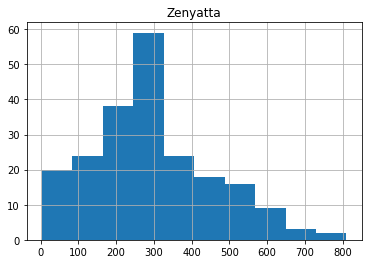

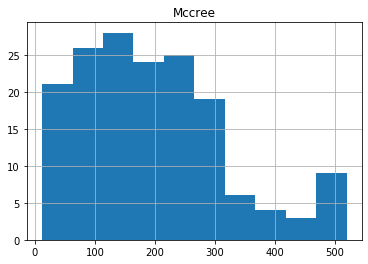

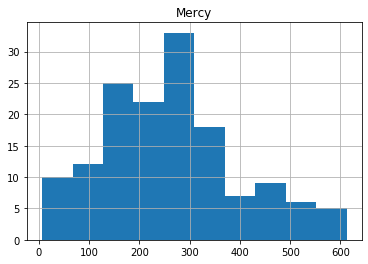

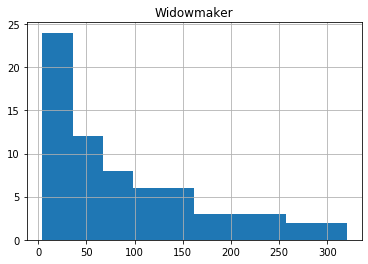

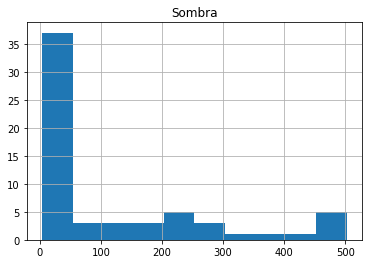

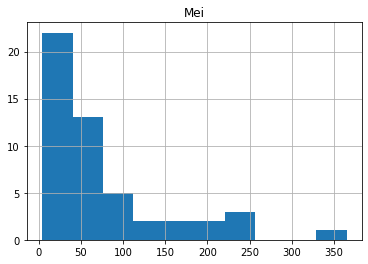

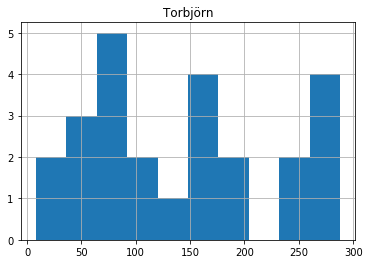

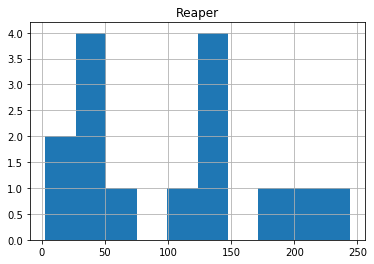

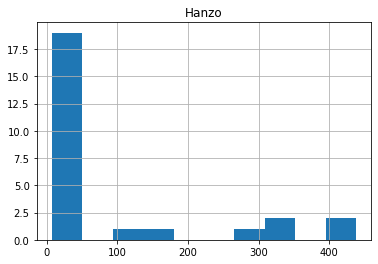

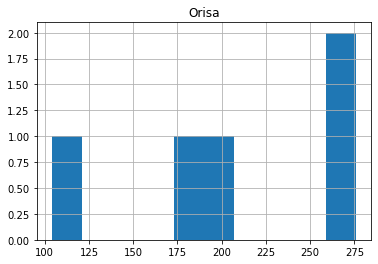

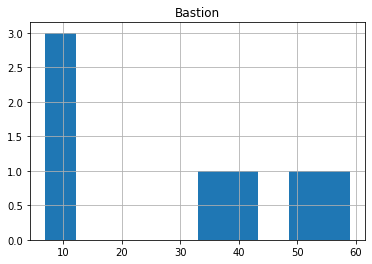

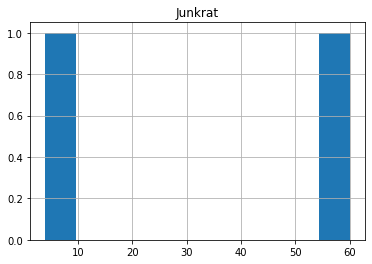

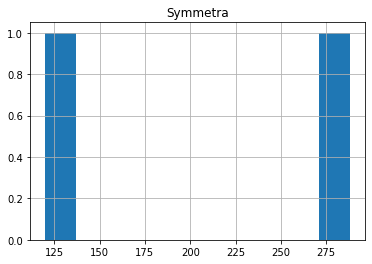

In [35]:
#This shows a distribution of the time played on each hero
for one_hero in get_heroes(df):
  plt.title(one_hero)
  hd[hd.hero==one_hero].timePlayed.hist()
  plt.title(one_hero)
  plt.show()

In [36]:
time_played= []
for one_hero in get_heroes(df):
  time_played+= [one_hero,(hd[hd.hero==one_hero].timePlayed.sum())/60]
time_played

['Lucio',
 5124.566666666667,
 'Tracer',
 3587.5333333333333,
 'Ana',
 3534.516666666667,
 'Winston',
 3062.25,
 'Soldier: 76',
 2401.0333333333333,
 'D.Va',
 2803.75,
 'Genji',
 2402.733333333333,
 'Reinhardt',
 2250.95,
 'Zarya',
 1485.1666666666667,
 'Roadhog',
 1286.75,
 'Pharah',
 956.4166666666666,
 'Zenyatta',
 1045.0666666666666,
 'Mccree',
 548.5833333333334,
 'Mercy',
 647.2666666666667,
 'Widowmaker',
 103.88333333333334,
 'Sombra',
 123.0,
 'Mei',
 62.18333333333333,
 'Torbjörn',
 58.6,
 'Reaper',
 25.116666666666667,
 'Hanzo',
 37.8,
 'Orisa',
 17.266666666666666,
 'Bastion',
 3.6333333333333333,
 'Junkrat',
 1.0666666666666667,
 'Symmetra',
 6.8]

In [37]:
hd.maptype.value_counts()

Control    2552
Hybrid     1891
Assault    1148
Escort     1051
Name: maptype, dtype: int64

In [0]:
grouped = hd.groupby(by = 'maptype')
df_dict = {}
for key,group in grouped:
  df_dict[key] = group

hd_assault=df_dict['Assault']
hd_control=df_dict['Control']
hd_escort=df_dict['Escort']
hd_hybrid=df_dict['Hybrid']

In [39]:
#I actually may not need to deal with the "hand assigning" I can just loop through the dictionary when I need to 
#This dataframe includes the value counts of every hero split by maptype
# mhc = maptype_hero_count

mhc = pd.DataFrame(data=None,columns =['hero','maptype','hero_count'])

for key in df_dict:
  a = df_dict[key].hero.value_counts()
  b = a.index.to_list()
  c = a.to_list()
  d = [key]*len(a)
  mhc_temp = pd.DataFrame([b,c,d]).T
  mhc_temp.columns=['hero','hero_count','maptype']
  mhc = pd.concat([mhc,mhc_temp],sort=True)
mhc

,hero,hero_count,maptype
0,Tracer,134,Assault
1,Lucio,120,Assault
2,Winston,118,Assault
3,D.Va,115,Assault
4,Ana,113,Assault
...,...,...,...
18,Torbjörn,12,Hybrid
19,Reaper,6,Hybrid
20,Bastion,4,Hybrid
21,Symmetra,2,Hybrid


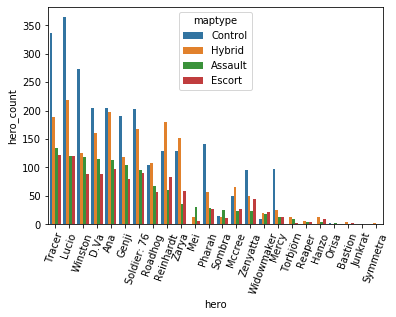

In [40]:
test = sns.barplot(x='hero',y='hero_count',hue='maptype',data=mhc,hue_order = ['Control','Hybrid','Assault','Escort'])
for item in test.get_xticklabels():
    item.set_rotation(70)

In [41]:
#Lets try to get the sums of the time played
all_heroes = get_heroes(hd)
playtime = []
maptype = []
df_hero_col = []

for key in df_dict:
  current_df = df_dict[key]
  for hero in all_heroes:
    tp=current_df[current_df.hero==hero].timePlayed.sum()
    playtime.append(tp)
    maptype.append(key)
    df_hero_col.append(hero)

#Lets call this hpt hero playtime

hpt = pd.DataFrame([df_hero_col,maptype,playtime]).T
hpt.columns=['hero','maptype','timeplayed']
hpt_assault = hpt[hpt.maptype=='Assault']
hpt_assault.head()

,hero,maptype,timeplayed
0,Lucio,Assault,51135
1,Tracer,Assault,34191
2,Ana,Assault,42505
3,Winston,Assault,40211
4,D.Va,Assault,41347


In [42]:
#This shows the amount of time played total in the dataset
#keep in mind that because the dataset is sorted by hero, instead of by match
#the values don't perfectly reflect game time. This is shown with how the number
#of match ids aren't consistent
ts = hpt.timeplayed.sum()
tm = ts/60
th = tm/60
td = th/24

print(tm,th,td)
print('Remember we have to account 12 heroes per game + switches')
print('Lets estimate that each player switches 3 times')
print('Roughly the number of hours of data:',th/36)

31575.933333333334 526.2655555555556 21.927731481481484
Remember we have to account 12 heroes per game + switches
Lets estimate that each player switches 3 times
Roughly the number of hours of data: 14.618487654320989


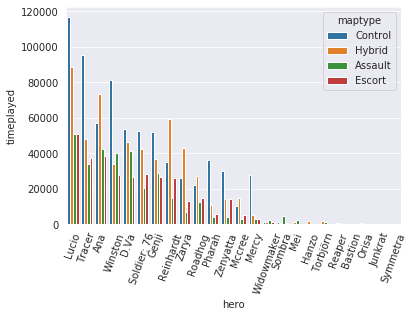

In [93]:
# 'timeplayed_m'
tp_all_modes = sns.barplot(x='hero',y='timeplayed',hue='maptype',data=hpt,hue_order = ['Control','Hybrid','Assault','Escort'])
for item in tp_all_modes.get_xticklabels():
    item.set_rotation(70)

Text(0.5, 1.0, 'Disparities in Hero Selection')

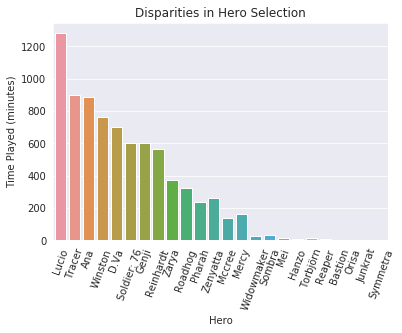

In [99]:
# 'timeplayed_m'
tp_all_modes = sns.barplot(x='hero',y=hpt.timeplayed/60,data=hpt,ci=None)
for item in tp_all_modes.get_xticklabels():
    item.set_rotation(70)
tp_all_modes.set_ylabel('Time Played (minutes)')
tp_all_modes.set_xlabel('Hero')
tp_all_modes.set_title('Disparities in Hero Selection')

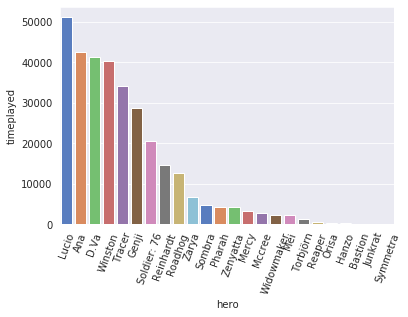

In [89]:
#tp= time played
#Cumulative time played for each hero in assault mode
hpt_assault_sorted=hpt_assault.sort_values(by='timeplayed',ascending=False)
tp = sns.barplot(x='hero',y='timeplayed',data = hpt_assault_sorted,palette = blue_pal)
for item in tp_assault.get_xticklabels():
    item.set_rotation(70)
for i in tp_assault.patches:
  i.set_width(0.8)
tp_assault



The above graph, however, is just cumulative time. We can look at average time to get a true sense of "average time" however, we need to engineer a feature that outputs "game" time. In this dataset the heroes are given by "selection". so if somebody switches off to a hero within a match that counts as playtime for that hero. To get a better sense of the average amount of time a hero plays during a match you would have to split up the rows of the dataset by match_id, and subsequently divide the datasets by round number. From there you would sum the time played for every character, and then create a new column/new dataframe with the time information.

In [45]:
#Lets see playtime for all heroes in all modes:
a = {}
for one_hero in all_heroes:
  a[one_hero]=(hpt[hpt.hero==one_hero].timeplayed.sum())

#converting seconds to minutes
for k,v in a.items():
  a[k]=v/60

#This is one way to view items by number as opposed to name:
inv_map = {v:k for k, v in a.items()}
inv_map


{1.0666666666666667: 'Junkrat',
 3.6333333333333333: 'Bastion',
 6.8: 'Symmetra',
 17.266666666666666: 'Orisa',
 25.116666666666667: 'Reaper',
 37.8: 'Hanzo',
 58.6: 'Torbjörn',
 62.18333333333333: 'Mei',
 103.88333333333334: 'Widowmaker',
 123.0: 'Sombra',
 548.5833333333334: 'Mccree',
 647.2666666666667: 'Mercy',
 956.4166666666666: 'Pharah',
 1045.0666666666666: 'Zenyatta',
 1286.75: 'Roadhog',
 1485.1666666666667: 'Zarya',
 2250.95: 'Reinhardt',
 2401.0333333333333: 'Soldier: 76',
 2402.733333333333: 'Genji',
 2803.75: 'D.Va',
 3062.25: 'Winston',
 3534.516666666667: 'Ana',
 3587.5333333333333: 'Tracer',
 5124.566666666667: 'Lucio'}

In [46]:
#Same values in hours:
for k,v in a.items():
  a[k]=v/60
inv_map = {v:k for k, v in a.items()}
inv_map

{0.017777777777777778: 'Junkrat',
 0.06055555555555556: 'Bastion',
 0.11333333333333333: 'Symmetra',
 0.28777777777777774: 'Orisa',
 0.4186111111111111: 'Reaper',
 0.63: 'Hanzo',
 0.9766666666666667: 'Torbjörn',
 1.0363888888888888: 'Mei',
 1.731388888888889: 'Widowmaker',
 2.05: 'Sombra',
 9.143055555555556: 'Mccree',
 10.787777777777778: 'Mercy',
 15.940277777777776: 'Pharah',
 17.417777777777776: 'Zenyatta',
 21.445833333333333: 'Roadhog',
 24.75277777777778: 'Zarya',
 37.51583333333333: 'Reinhardt',
 40.01722222222222: 'Soldier: 76',
 40.04555555555555: 'Genji',
 46.729166666666664: 'D.Va',
 51.0375: 'Winston',
 58.908611111111114: 'Ana',
 59.79222222222222: 'Tracer',
 85.40944444444445: 'Lucio'}

## Game outcome

I split the original hd dataframe into wins and losses, and I graphed t
I haven't done any tests to determine if the difference is due to randomness or not (ttest for example), but visually it is pretty clear that these individuals stats don't have too heavy a bearing on the outcome of the match. 

More generally (and again this isn't a statistical statement just my insight put into words) A players individual performance has little bearing on the outcome of the game. This makes some sense if you think about it because it is a team game. An individual might have a great k/d, but if that is because they run whenever they are losing a teamfight then their team would lose. 

More succictly the game is balanced, and it is heavily dependent on team,not individual performance.



### W.R.T ```kills```

Overall Kills:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8499fe6550>)

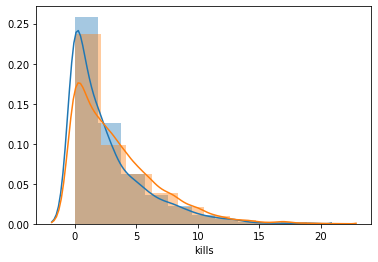

In [47]:
# I care about the performance of the hero, and the outcome of the round.
wins = hd[hd['win']==True]
wins_dict = group_by(wins,"hero")
wins_dict['D.Va']
loss = hd[hd['win']==False]
loss_dict = group_by(loss,'hero')

#But first lets graph wins vs losses overall:
def graph_wl(feature,loss,wins):
  fig,ax = plt.subplots()
  sns.distplot(loss[feature],ax=ax,bins=10);
  sns.distplot(wins[feature],ax=ax,bins=10);
  return fig,ax

graph_wl('kills',loss,wins)
#It doesn't seem like number of kills is a good predictor of wins/losses
#We can do the ttest to fail to reject the null hypothesis that number of kills influences
#winning the match. 

#this supports the fact that overwatch is a team game. Individual performance is important
#but it isn't a predictor of winning. Team performance is
#How can I measure "team performance"



Hero Specific Kills:

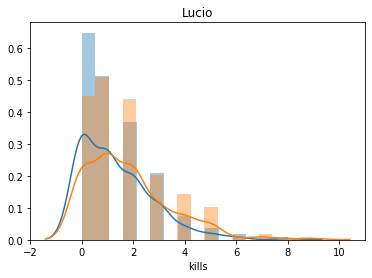

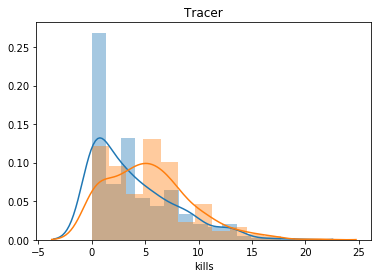

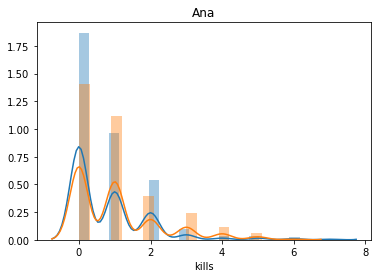

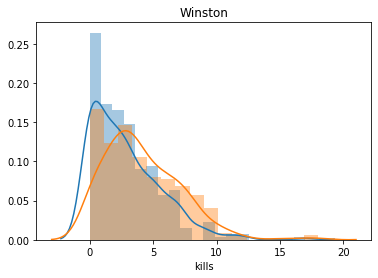

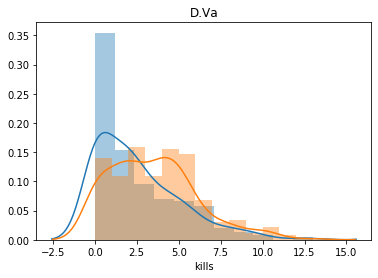

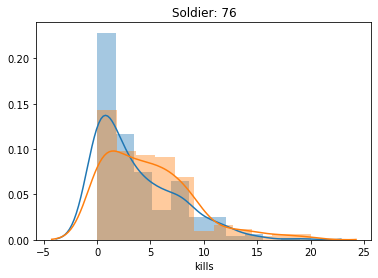

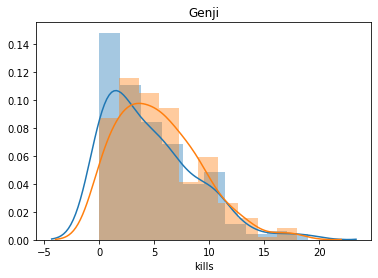

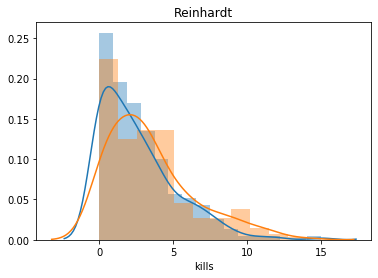

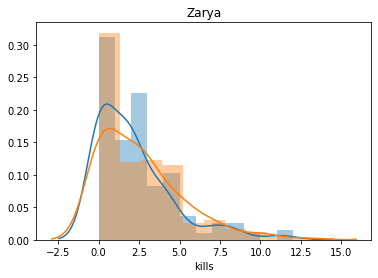

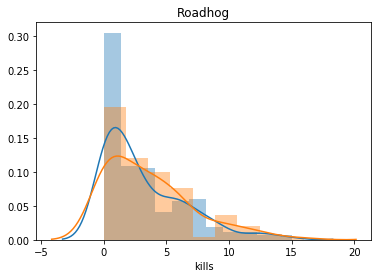

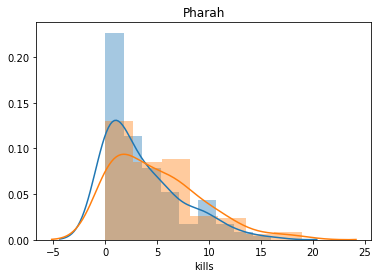

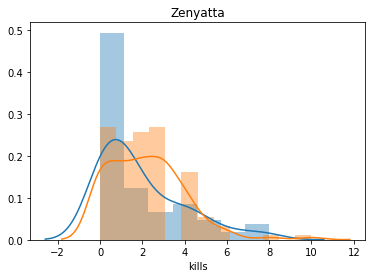

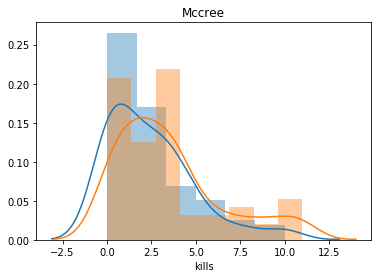

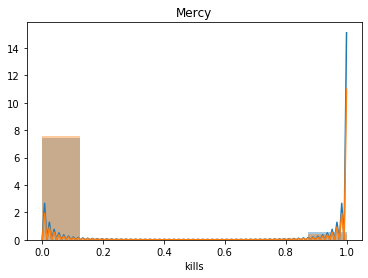

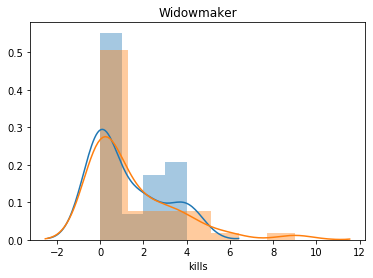

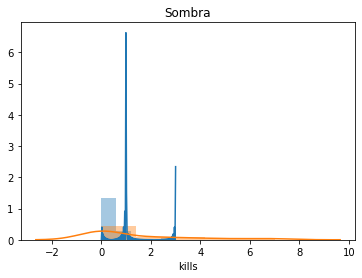

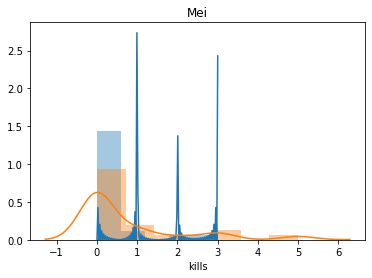

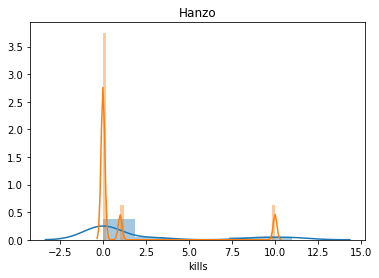

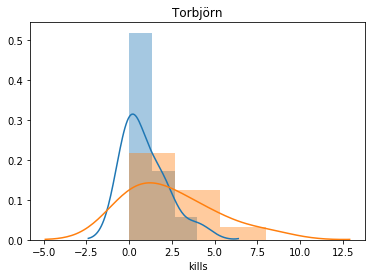

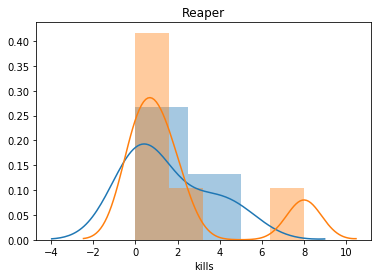

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



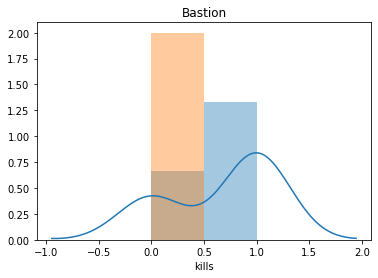

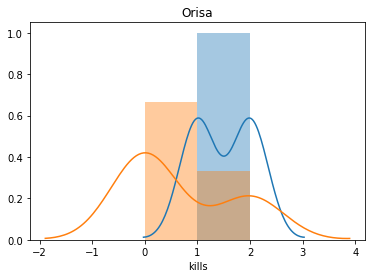

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars



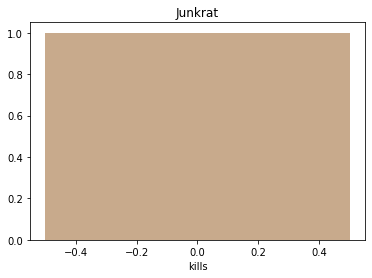

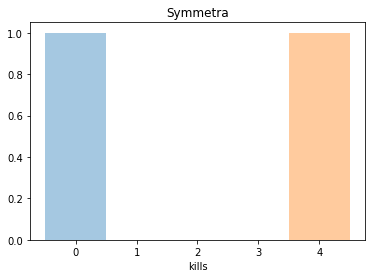

In [48]:
#Graphing distribution of kills in rounds won and lost by each hero
#Slight variations here can tell us what characters are especially important to play
def graph_wl_by_hero(feature):
  for hero in all_heroes:
    #color of losses = blue
    sns.distplot(loss_dict[hero][feature])
    #color of wins = orange
    sns.distplot(wins_dict[hero][feature])
    plt.title(hero)
    plt.show()

graph_wl_by_hero("kills")

### W.R.T ```fightsWon```

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8499ffb240>)

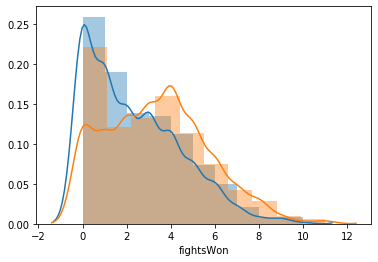

In [49]:
graph_wl('fightsWon',loss,wins)

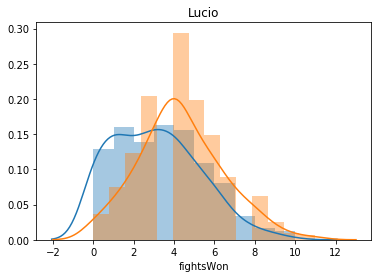

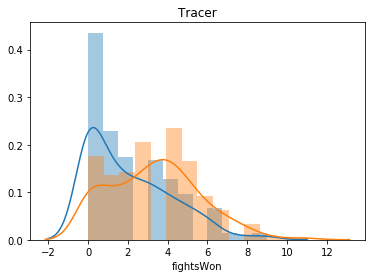

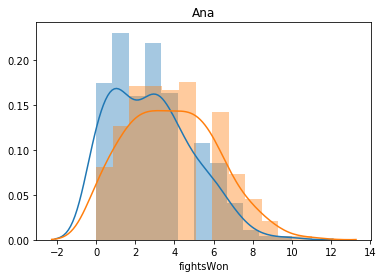

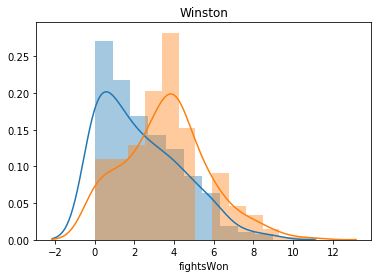

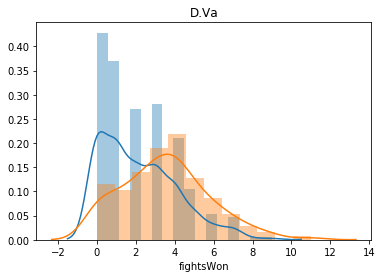

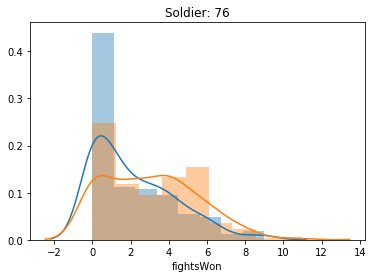

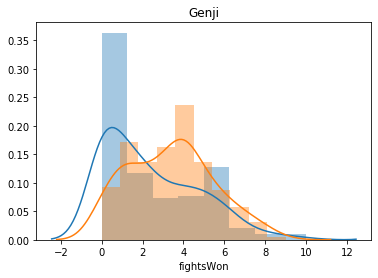

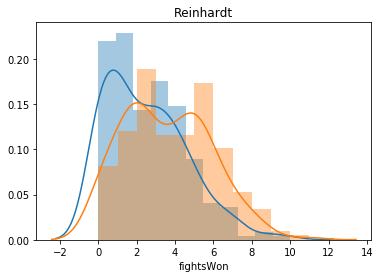

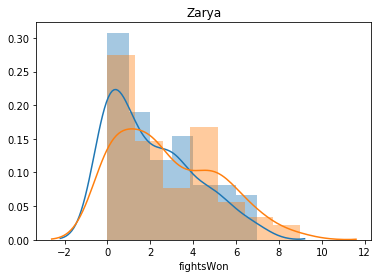

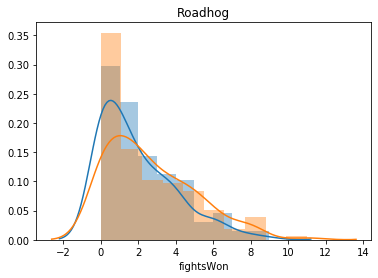

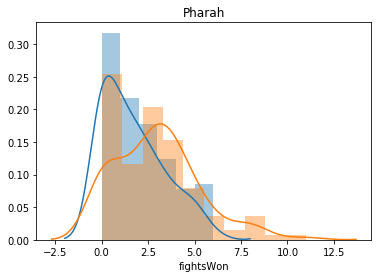

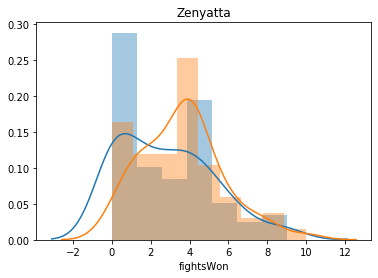

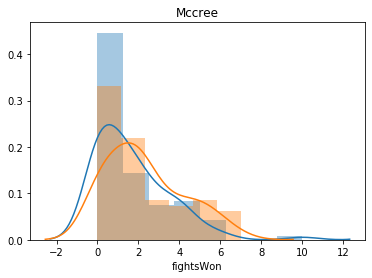

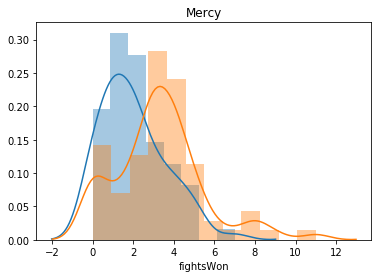

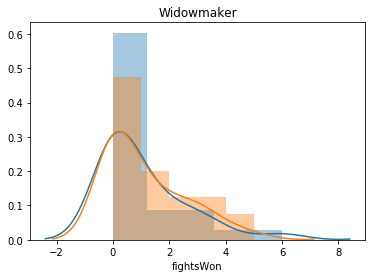

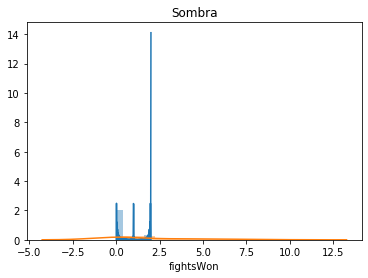

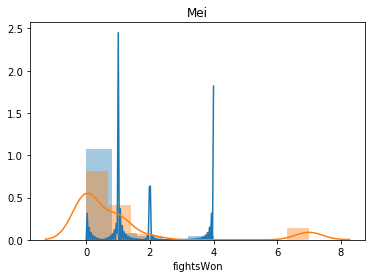

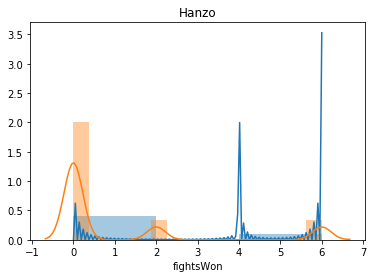

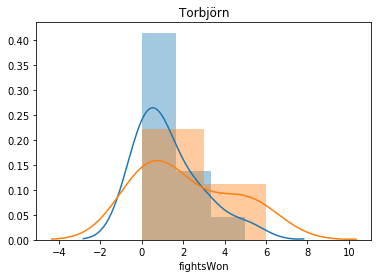

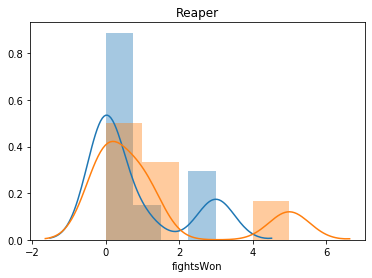

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



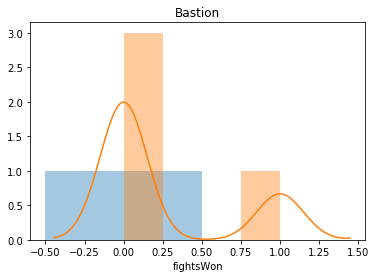

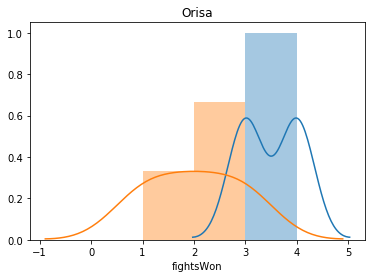

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars



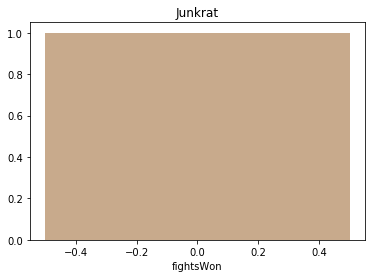

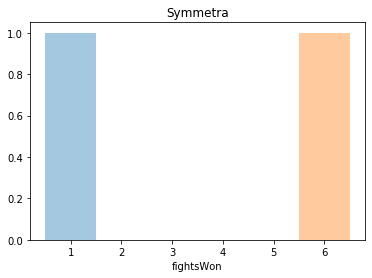

In [50]:
graph_wl_by_hero('fightsWon')

### W.R.T ```deaths```

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8499bf6fd0>)

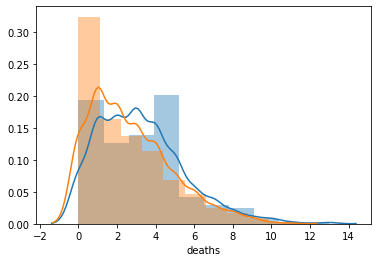

In [51]:
graph_wl('deaths',loss,wins)

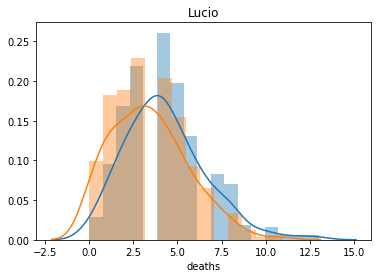

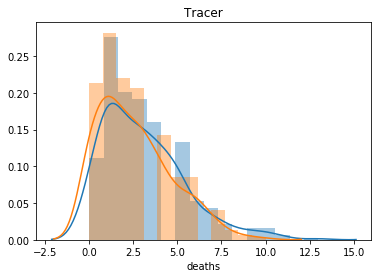

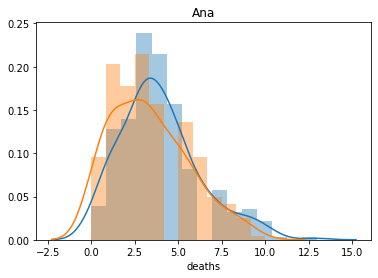

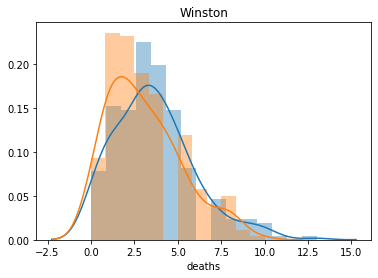

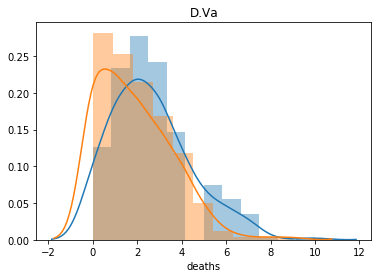

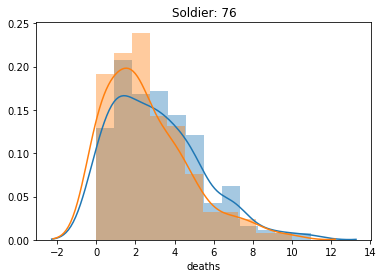

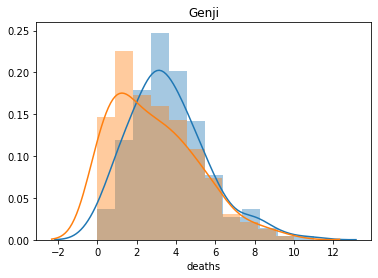

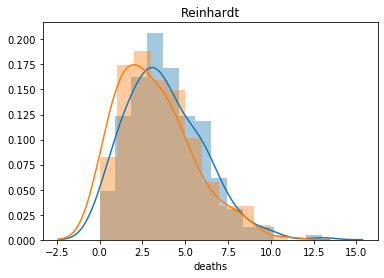

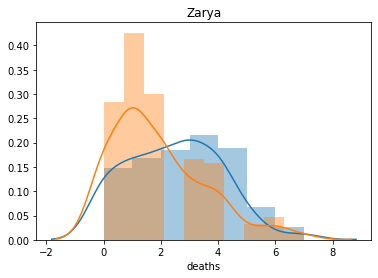

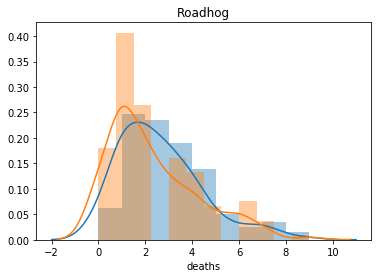

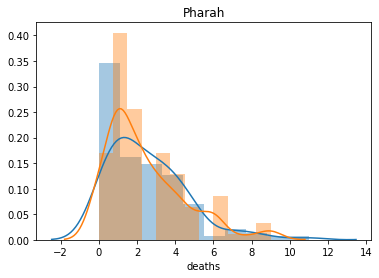

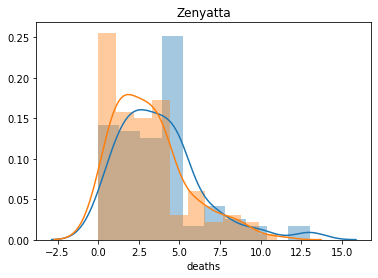

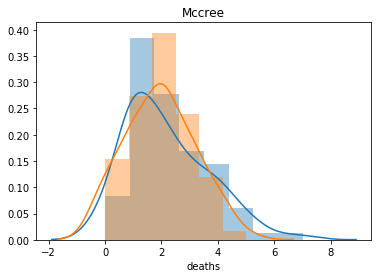

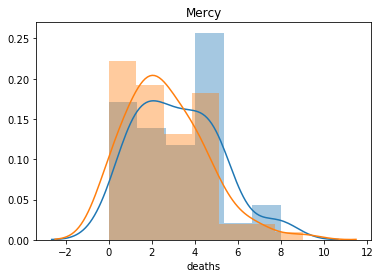

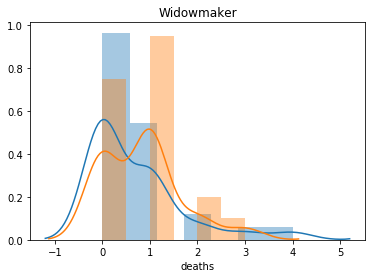

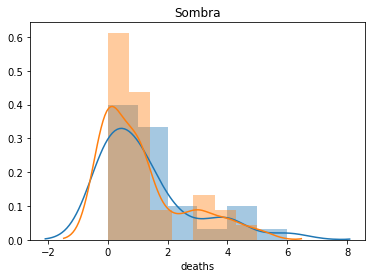

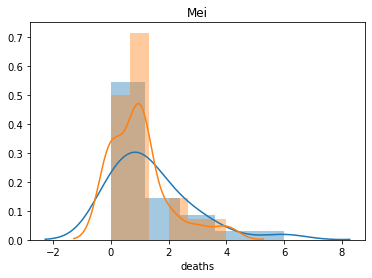

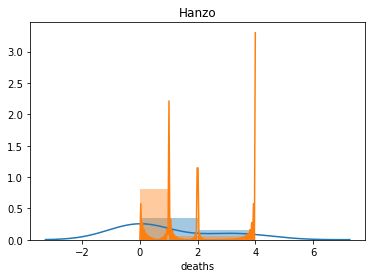

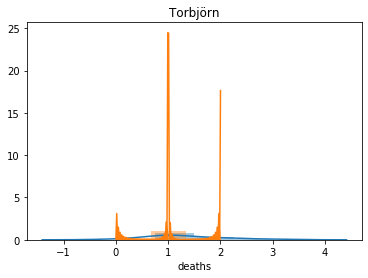

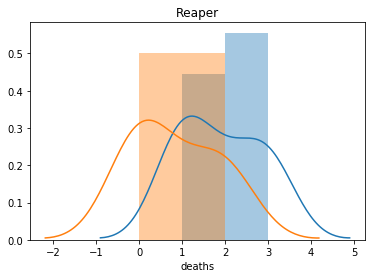

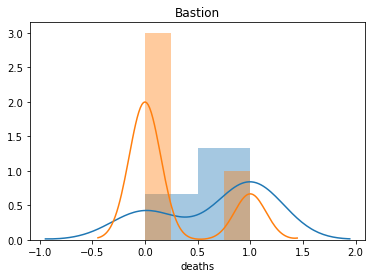

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



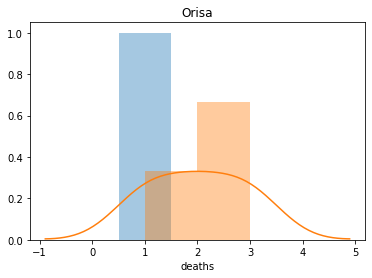

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars



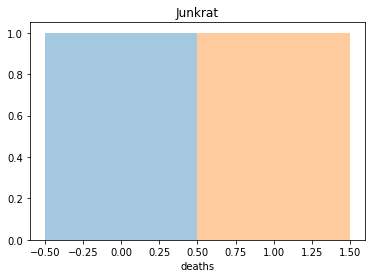

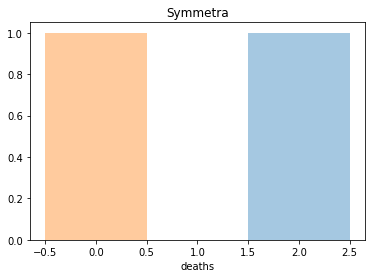

In [52]:
graph_wl_by_hero('deaths')

### W.R.T ```ultsUsed```

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f84998da828>)

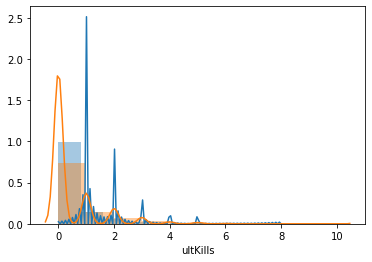

In [53]:
graph_wl('ultKills',loss,wins)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



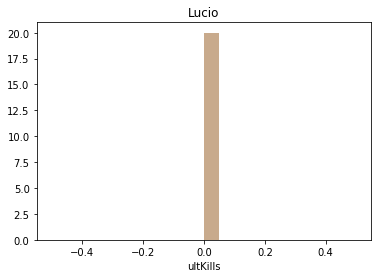

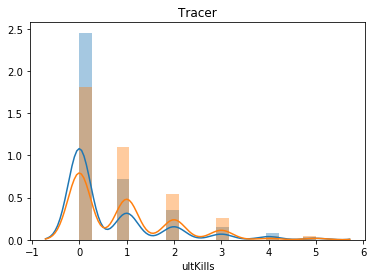

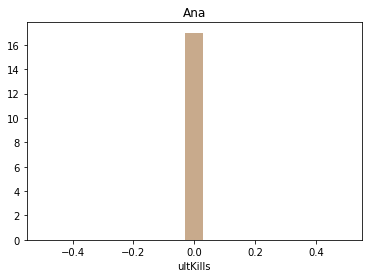

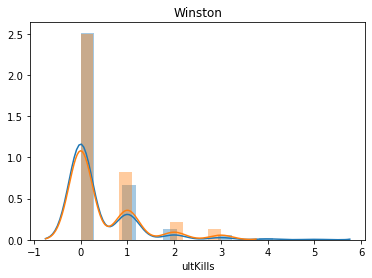

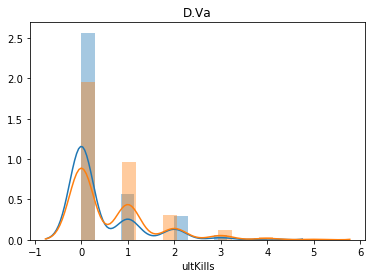

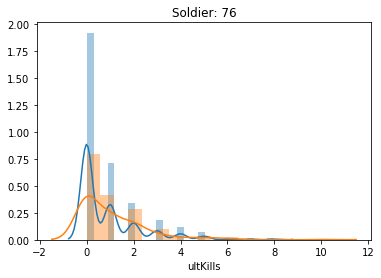

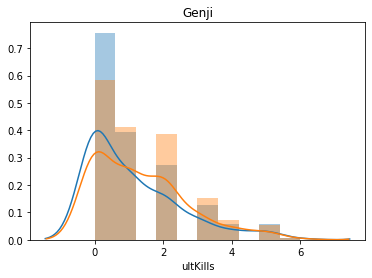

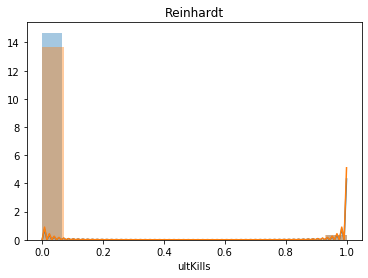

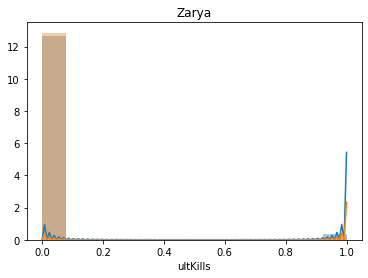

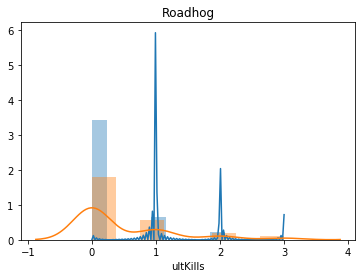

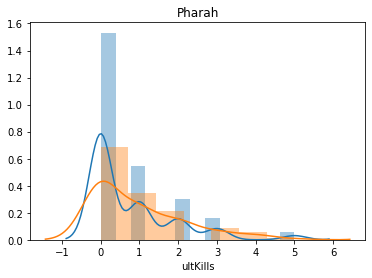

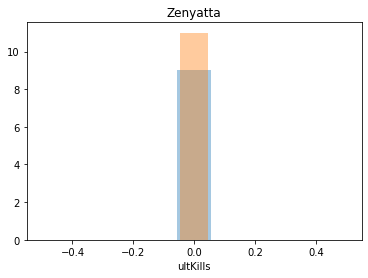

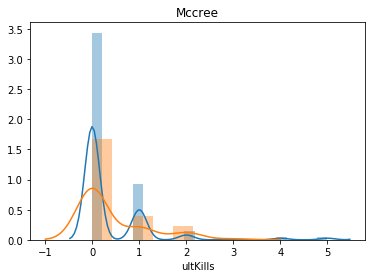

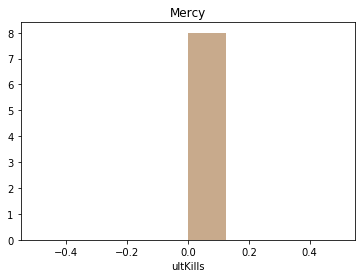

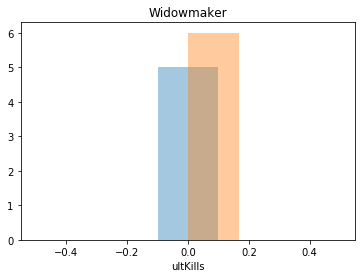

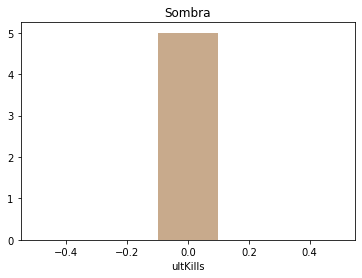

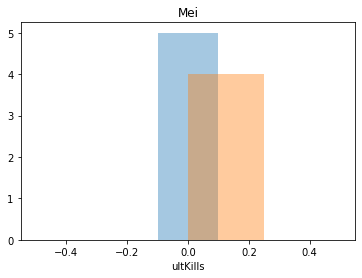

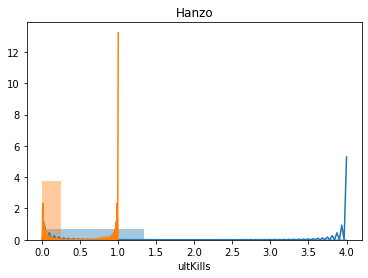

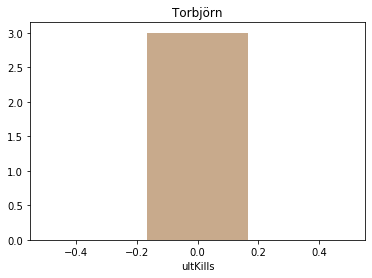

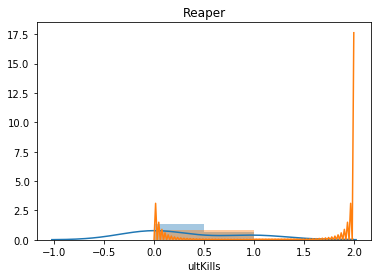

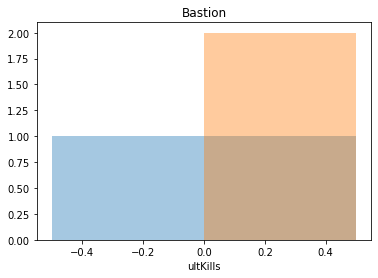

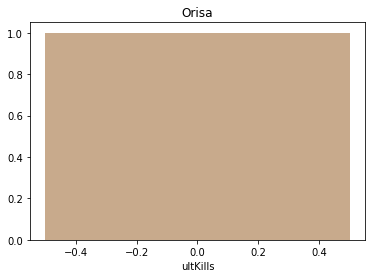

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars



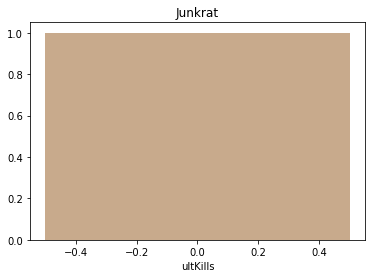

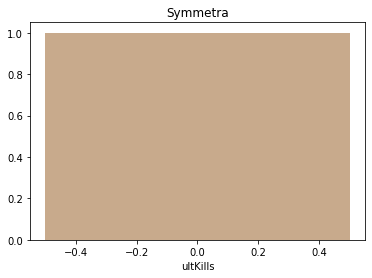

In [54]:
graph_wl_by_hero('ultKills')

## Trying to decipher teamsKills

My conclusion from this section is that teamsKills is "assists". Where the hero, within a match, did damage to that many people, but didn't deliver the finishing blow. 

Kills on the other hand are when the hero did deliver the finishing blow. The two values do not overlap in the game

In [55]:
# I don't think matchID and teamsKills mean what I think they mean
# the teamsKills seems like total team kill in that particular round, but 
#it doesn't always make sense. 
df2=hd[['hero','kills','deaths','teamsKills','fights','matchID','team','team1','team1Score','team2','team2Score']]
my_dict = group_by(df2,'matchID')
my_dict[825]



,hero,kills,deaths,teamsKills,fights,matchID,team,team1,team1Score,team2,team2Score
492,Lucio,4,1,27,6,825,28,19,1,28,2
493,Soldier: 76,7,1,20,3,825,28,19,1,28,2
494,Tracer,1,1,7,3,825,28,19,1,28,2
495,Reinhardt,2,2,4,7,825,19,19,1,28,2
496,Winston,2,1,7,3,825,19,19,1,28,2
...,...,...,...,...,...,...,...,...,...,...,...
6392,Winston,0,5,6,5,825,28,19,3,28,1
6393,D.Va,2,3,16,10,825,28,19,3,28,1
6394,Lucio,3,3,22,10,825,19,19,3,28,1
6395,Zarya,11,1,22,10,825,19,19,3,28,1


In [56]:
my_dict2 = group_by(my_dict[825],'team')
print(my_dict2[19].kills.sum())
print(my_dict2[28].kills.sum())
print(my_dict2[19].teamsKills.sum())
print(my_dict2[28].teamsKills.sum())
my_dict2[19]

214
205
1284
1230


,hero,kills,deaths,teamsKills,fights,matchID,team,team1,team1Score,team2,team2Score
495,Reinhardt,2,2,4,7,825,19,19,1,28,2
496,Winston,2,1,7,3,825,19,19,1,28,2
500,Soldier: 76,0,4,4,7,825,19,19,1,28,2
501,Tracer,1,1,7,3,825,19,19,1,28,2
502,Ana,1,4,11,10,825,19,19,1,28,2
...,...,...,...,...,...,...,...,...,...,...,...
6389,Tracer,0,1,9,1,825,19,19,3,28,1
6390,Ana,0,1,22,10,825,19,19,3,28,1
6394,Lucio,3,3,22,10,825,19,19,3,28,1
6395,Zarya,11,1,22,10,825,19,19,3,28,1


In [57]:
#Notice how in the next two dataframe the teamsKills value will match 
#WITHIN the same matchID
a = group_by(df2,'team')[19]
a[a.hero=="Ana"]

,hero,kills,deaths,teamsKills,fights,matchID,team,team1,team1Score,team2,team2Score
427,Ana,0,5,44,11,816,19,8,2,19,2
444,Ana,0,4,13,7,816,19,8,2,19,2
502,Ana,1,4,11,10,825,19,19,1,28,2
521,Ana,1,4,12,5,825,19,19,1,28,2
689,Ana,1,5,24,10,814,19,27,1,19,1
715,Ana,0,3,34,11,814,19,27,1,19,1
733,Ana,1,3,9,7,820,19,15,2,19,1
749,Ana,0,4,7,4,820,19,15,2,19,1
799,Ana,0,2,18,3,824,19,19,1,27,1
814,Ana,0,3,37,12,824,19,19,1,27,1


In [58]:
a[a.hero=="Lucio"]

,hero,kills,deaths,teamsKills,fights,matchID,team,team1,team1Score,team2,team2Score
431,Lucio,3,8,44,11,816,19,8,2,19,2
449,Lucio,0,4,13,7,816,19,8,2,19,2
506,Lucio,2,4,11,10,825,19,19,1,28,2
526,Lucio,1,6,12,6,825,19,19,1,28,2
692,Lucio,1,5,24,10,814,19,27,1,19,1
717,Lucio,0,4,34,11,814,19,27,1,19,1
735,Lucio,0,6,16,10,820,19,15,2,19,1
751,Lucio,0,5,7,4,820,19,15,2,19,1
801,Lucio,0,1,18,3,824,19,19,1,27,1
816,Lucio,1,4,37,12,824,19,19,1,27,1


These values match betwen heroes. Maybe teamsKills is the "assist" value for the player who played all those heroes in the game. 
<img src="https://drive.google.com/uc?id=1KOjyU_qnCwq4dUkrw9NXRvCIdMoPe3V9" width="570" height="318" />



In [59]:
print(sum(a[a.matchID == 816].kills))
a[a.matchID == 816]
#I'm prettyu sure now that teams kills is assists, and kills are solo-kills. 
#This will help with "effectiveness."

183


,hero,kills,deaths,teamsKills,fights,matchID,team,team1,team1Score,team2,team2Score
423,D.Va,10,3,44,11,816,19,8,2,19,2
424,Winston,8,7,44,11,816,19,8,2,19,2
426,Tracer,11,7,44,11,816,19,8,2,19,2
427,Ana,0,5,44,11,816,19,8,2,19,2
431,Lucio,3,8,44,11,816,19,8,2,19,2
...,...,...,...,...,...,...,...,...,...,...,...
5207,Tracer,0,1,0,1,816,19,8,3,19,1
5208,Ana,0,4,5,7,816,19,8,3,19,1
5211,Lucio,0,6,5,7,816,19,8,3,19,1
5212,Roadhog,2,4,5,6,816,19,8,3,19,1


## Blog Visuals

### Visual 1 Prep

The first visual will show ultimate usage effectiveness

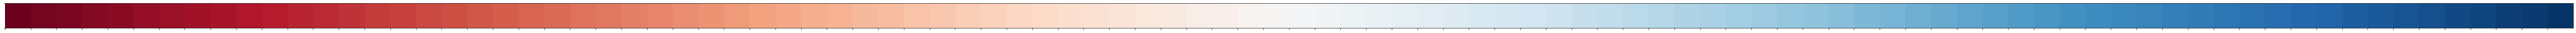

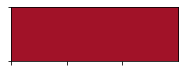

In [60]:
pal = sns.color_palette('RdBu',n_colors=100)
sns.palplot(pal)
sns.palplot(pal[7])


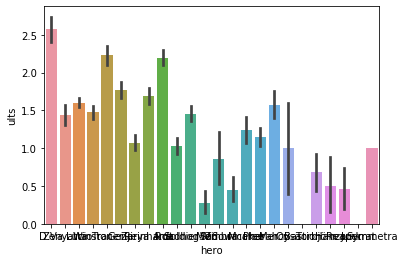

In [61]:
hd['ultKillsPUlt']=hd.ultKills/hd.ults
sns.barplot(x='hero',y='ults',data=hd)

In [62]:
a = hd.hero.value_counts()
print(a.index)
means_df.index
#Lets merge this value_counts() to the mean values 

Index(['Lucio', 'Tracer', 'Ana', 'Winston', 'D.Va', 'Soldier: 76', 'Genji',
       'Reinhardt', 'Zarya', 'Roadhog', 'Pharah', 'Zenyatta', 'Mccree',
       'Mercy', 'Widowmaker', 'Sombra', 'Mei', 'Hanzo', 'Torbjörn', 'Reaper',
       'Bastion', 'Orisa', 'Junkrat', 'Symmetra'],
      dtype='object')


Index(['Lucio', 'Tracer', 'Ana', 'Winston', 'D.Va', 'Soldier: 76', 'Genji',
       'Reinhardt', 'Zarya', 'Roadhog', 'Zenyatta', 'Pharah', 'Mercy',
       'Mccree', 'Sombra', 'Widowmaker', 'Torbjörn', 'Mei', 'Hanzo', 'Reaper',
       'Orisa', 'Symmetra'],
      dtype='object')

In [0]:
means_df_2  = means_df.join(a)
means_df_2.rename(columns={'hero':'heroPick'})
means_df_2.head()
means_df_3=means_df_2.sample(frac=1)


In [64]:
#Lets drop all the heroes that don't have any ults
means_df_2=means_df_2[means_df_2.ultKills!=0]
means_df_2

,firstUlts,ultKills,ults,ultsUsed,timeToChargeFirstUlts,timeToChargeUlts,timeUltsHold,ultKillsPUlt,hero
Tracer,1.182400,0.929600,2.779200,2.641600,94.576000,204.145600,77.905600,0.351908,781
Winston,1.158763,0.486598,1.808247,1.754639,135.843299,207.876289,67.047423,0.277321,606
D.Va,1.119658,0.608974,3.106838,3.025641,119.232906,220.957265,65.933761,0.201271,567
Soldier: 76,1.175904,1.291566,1.920482,1.881928,117.416867,191.472289,65.118072,0.686300,555
Genji,1.173913,1.422705,2.086957,2.016908,110.838164,200.294686,66.644928,0.705389,492
Reinhardt,1.124011,0.026385,1.992084,1.910290,117.635884,199.860158,76.031662,0.013812,452
Zarya,1.080321,0.028112,1.602410,1.570281,129.763052,190.614458,45.903614,0.017903,376
Roadhog,1.112745,0.563725,1.637255,1.583333,124.696078,185.838235,56.661765,0.356037,336
Pharah,1.161677,1.245509,1.700599,1.628743,117.736527,171.173653,62.221557,0.764706,254
Mccree,1.063063,0.567568,1.729730,1.639640,93.396396,146.324324,54.153153,0.346154,165


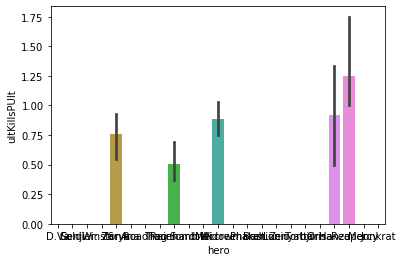

In [65]:
#here is the original dataset. Doing a bar graph from the original should show error bars:
hd_a = hd[hd.ultKillsPUlt!=0]
sns.barplot(x='hero',y='ultKillsPUlt',data=hd_a)

### Visual 1

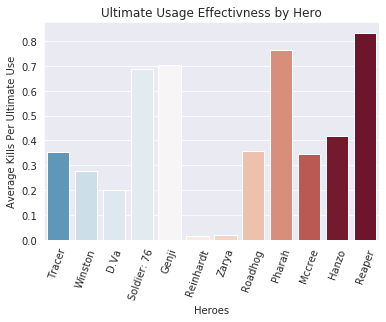

In [105]:
#Remember the means df was produced from the original hd 
#We can look at hero value counts to "color" the bars here:
clrs = [pal[round(x/10)]for x in means_df_2.hero ]
x = means_df_2.index
y = means_df_2.ultKillsPUlt
# mpl.rc('font', family='Jomolhari')
fig,ax = plt.subplots()
sns.barplot(x,y,palette = clrs,ax=ax)
# means_df.plot(y='ultKillsPUlt',kind = 'bar',use_index=True,palette = clrs)
# means_df.head()
for item in ax.get_xticklabels():
    item.set_rotation(70)
for i in ax.patches:
  i.set_width(0.8)
ax.set_ylabel("Average Kills Per Ultimate Use")
ax.set_xlabel('Heroes')
ax.set_title('Ultimate Usage Effectivness by Hero')
# sns.set(font='Jomolhari')
sns.set_style('darkgrid')
fig.savefig('visual1.svg', format='svg', dpi=1200)

### Visual 2 Prep

The second visual is going to show win loss distributions with respect to: kills, deaths, and fights

In [67]:
wins = hd[hd['win']==True]
wins_dict = group_by(wins,"hero")
wins_dict['D.Va']
loss = hd[hd['win']==False]
loss_dict = group_by(loss,'hero')
dps = ['Widowmaker','Mei','Hanzo','Torbjörn','Reaper',
       'Bastion','Junkrat','Tracer','Soldier: 76',
       'Genji','Pharah','Mccree', 'Sombra','Reaper']
tanks = ['Winston','D.Va','Reinhardt', 'Zarya',
         'Roadhog', 'Orisa',]
support = ['Lucio','Ana','Mercy','Zenyatta','Symmetra']
tempw = pd.DataFrame(data = None, columns=wins.columns)
templ = pd.DataFrame(data = None, columns=wins.columns)
temp.head()
for i in dps:
  dpsw = wins[wins.hero==i]
  dpsl = loss[loss.hero==i]
  tempw = pd.concat([tempw,dpsw])
  templ = pd.concat([templ,dpsl])

wins_dps = tempw
loss_dps = templ
print(wins_dps)
print(loss_dps)

            hero               map  ...   win ultKillsPUlt
77    Widowmaker          Hanamura  ...  True          0.0
115   Widowmaker          Hanamura  ...  True          NaN
198   Widowmaker          Hanamura  ...  True          NaN
272   Widowmaker          Hanamura  ...  True          NaN
375   Widowmaker          Hanamura  ...  True          0.0
...          ...               ...  ...   ...          ...
695       Reaper  Temple of Anubis  ...  True          2.0
719       Reaper  Temple of Anubis  ...  True          NaN
2727      Reaper             Nepal  ...  True          NaN
4106      Reaper          Route 66  ...  True          NaN
5081      Reaper         Hollywood  ...  True          0.0

[1246 rows x 58 columns]
            hero               map  ...    win ultKillsPUlt
302   Widowmaker          Hanamura  ...  False          0.0
679   Widowmaker  Temple of Anubis  ...  False          0.0
766   Widowmaker  Temple of Anubis  ...  False          NaN
798   Widowmaker  Temple o

In [0]:
def graph_wl(feature,loss,wins):
  fig,ax = plt.subplots()
  sns.distplot(loss[feature],ax=ax,bins=10,label = "Wins");
  sns.distplot(wins[feature],ax=ax,bins=10,label = "Losses");
  return fig,ax

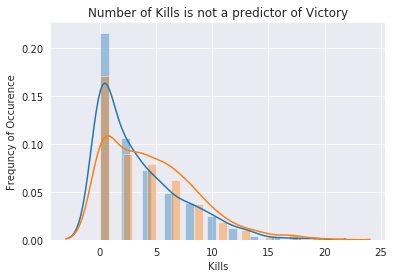

In [69]:
#attempting to show all four roles, and the distribituions of wins and losses 
#based on kills
#Initially I was thinking about using this as a figure, but the value counts is a 
#clearer comparison.
fig,ax = graph_wl('kills',loss_dps,wins_dps)
ax.set_xlabel("Kills")
ax.set_ylabel("Frequncy of Occurence")
ax.set_title('Number of Kills is not a predictor of Victory')
# ax.legend(['losses','wins'])
fig.savefig('visual2.png', format='png', dpi=1200)
for i in ax.patches:
  i.set_width(0.8)

In [70]:
#Lets put the same information in terms of winrate
kills_dict = group_by(hd,'kills')
print(len(kills_dict[1].win))
print(kills_dict[1].win.sum())
kills_dict[1]

#Now that we know that this is an effective method to get winrate
#lets find winrate for all the "kills"

1093
489


,hero,map,roundtype,kills,deaths,ults,ultsUsed,timeUltsHold,timePlayed,team1Score,team2Score,team1Distance,team2Distance,maptype,team,team1,team2,picWide,firstUlts,timeToChargeUlts,timeToChargeFirstUlts,matchID,gameNumber,headshotKills,ultKills,teamsKills,fights,fightsWon,fightsLost,firstKills,firstDeaths,first3Kills,first3Deaths,fights3Kills,fightsUltUsed,fightsUltUsedWon,fightsUltUsedLost,fightsUltUsedLessUlts,fightsUltUsedLessUltsWon,fightsUltUsedLessUltsLost,fightsUltUsedMoreUlts,fightsUltUsedMoreUltsWon,fightsUltUsedMoreUltsLost,ultAdvWhenUlted,ultAdvWhenUltedAndWon,ultAdvWhenUltedAndLost,ultsOutsideOfFight,ultsUsedAfter,ultsUsed1Pless,ultsUsed1PlessWon,ultsUsed2Pless,ultsUsed2PlessWon,ultsUsed1Pmore,ultsUsed1PmoreWon,ultsUsed2Pmore,ultsUsed2PmoreWon,win,ultKillsPUlt
3,Winston,Hanamura,Attack,1,2,1,1,86,205,1,2,0,0,Assault,12,16,12,/pics/heroes/winston_full.png,1,88,88,492,5,0,0,16,3,2,1,0,0,0,1,3,1,1,0,0,0,0,1,1,0,2,2,0,0,11,0,0,0,0,0,0,1,1,True,0.0
8,Lucio,Hanamura,Attack,1,6,3,3,56,512,1,2,0,0,Assault,16,16,12,/pics/heroes/lucio_full.png,1,425,104,492,5,0,0,15,10,1,8,0,2,0,1,7,3,1,1,2,1,1,0,0,0,-3,-2,-1,0,38,0,0,0,0,3,1,0,0,False,0.0
9,Ana,Hanamura,Attack,1,6,3,3,164,512,1,2,0,0,Assault,16,16,12,/pics/heroes/ana_full.png,1,317,76,492,5,0,0,15,10,1,8,0,2,0,2,7,3,1,1,1,1,0,1,0,1,0,-2,2,0,8,1,1,0,0,1,0,1,0,False,0.0
11,Roadhog,Hanamura,Attack,1,4,1,1,3,215,1,2,0,0,Assault,16,16,12,/pics/heroes/roadhog_full.png,1,108,108,492,5,1,0,9,3,1,2,1,1,1,2,3,1,1,0,1,1,0,0,0,0,-2,-2,0,0,35,0,0,0,0,1,1,0,0,False,0.0
13,Winston,Hanamura,Attack,1,3,1,1,29,159,1,2,0,0,Assault,16,16,12,/pics/heroes/winston_full.png,1,100,100,492,5,0,1,3,3,0,3,0,0,1,2,3,1,0,1,0,0,0,1,0,1,2,0,2,0,3,0,0,0,0,1,0,0,0,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,Torbjörn,Numbani,Defense,1,2,1,1,39,158,3,3,170,160,Hybrid,19,28,19,/pics/heroes/torbjorn_full.png,1,100,100,821,5,0,0,7,3,1,1,0,0,0,0,2,1,0,1,0,0,0,1,0,1,3,0,3,0,8,0,0,1,0,0,0,0,0,True,0.0
6601,Mei,Numbani,Defense,1,2,1,1,39,151,3,3,170,160,Hybrid,19,28,19,/pics/heroes/mei_full.png,1,92,92,821,5,1,0,6,3,1,1,0,0,1,1,2,1,0,1,0,0,0,1,0,1,3,0,3,0,0,0,0,1,0,0,0,0,0,True,0.0
6627,Reinhardt,Numbani,Defense,1,2,0,0,0,101,3,3,0,10,Hybrid,27,27,9,/pics/heroes/reinhardt_full.png,0,0,0,822,2,0,0,2,2,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,NaN
6630,Lucio,Numbani,Defense,1,4,1,1,84,331,3,3,0,10,Hybrid,27,27,9,/pics/heroes/lucio_full.png,1,116,116,822,2,1,0,12,5,1,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,False,0.0


In [71]:
#Gathering the information needed to plot by winrate as well as
#numerically looking at wins/losses.
winrates= []
totals= []
wins = []
losses = []

for key in kills_dict:
  total = len(kills_dict[key].win)
  win = kills_dict[key].win.sum()
  winrate = win/total
  # print(wins,total,winrate)
  winrates.append(winrate)
  totals.append(total)
  losses.append(total-win)
  wins.append(win)

kills = list(kills_dict.keys())
print(kills)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


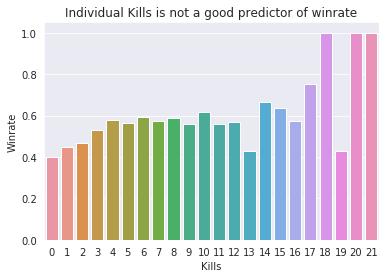

In [72]:
fig,ax = plt.subplots()
sns.barplot(kills,winrates,ax = ax);
ax.set_title('Individual Kills is not a good predictor of winrate');
ax.set_ylabel('Winrate');
ax.set_xlabel('Kills');


Looking at total number of wins and losses instead of winrate:

In [0]:
#here I make my own dictionary to turn into a df
comb_kills = kills+kills
comb_y = wins + losses
comb_hue = ["wins"]*22 + ['losses']*22

comb_df = pd.DataFrame([comb_kills,comb_y,comb_hue]).T
comb_df.rename(columns={2:"Key"},inplace=True)

### Visual 2

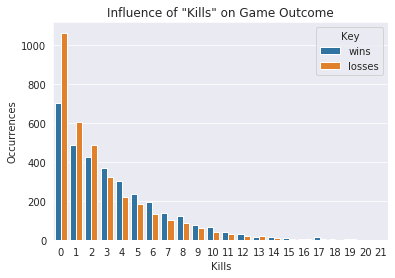

In [106]:
fig,ax =plt.subplots()
sns.barplot(0,1,"Key",data=comb_df,ax=ax);
ax.set_ylabel('Occurrences');
ax.set_xlabel('Kills');
ax.set_title('Influence of "Kills" on Game Outcome');
fig.savefig('visual2.svg', format='svg', dpi=1200)

### Visual 3

I realized that showing playtime would be an easy way to transition to the insights of the "Ultimate Usage" graph.

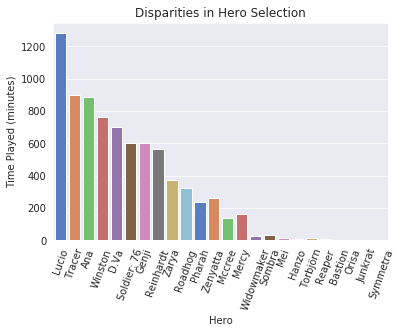

In [113]:
# 'timeplayed_m'
fig,ax =plt.subplots()
sns.barplot(x='hero',y=hpt.timeplayed/60,data=hpt,ci=None,ax=ax,palette=sns.color_palette('muted'))
for item in ax.get_xticklabels():
    item.set_rotation(70)
ax.set_ylabel('Time Played (minutes)')
ax.set_xlabel('Hero')
ax.set_title('Disparities in Hero Selection')
fig.savefig('visual3.svg', format='svg', dpi=1200)